## The MedCare Wellness Research Center 🩺

Welcome to the MedCare Wellness Research Center, where our passion and primary objective is to enhance the quality of life across diverse communities through a deeper understanding of their health and well-being. Utilizing a robust dataset encompassing 261.311 individuals, we delve into a rich array of health indicators and lifestyle variables. Our mission is ambitious yet clear: to proactively identify health trends and potential concerns within our population. 

Join us as we embark on this data-driven exploration to forge pathways towards healthier living!

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

%matplotlib inline
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA) 📉

At the heart of our analytical approach lies Exploratory Data Analysis (EDA), a fundamental phase that paves the way for insightful discoveries within our dataset.EDA holds a central position in the data analysis for understanding the data structure, unearthing outliers, and spotlighting patterns with the aid of intuitive plots and visualizations. Beyond mere observation, it is a rigorous process that ensures the cleanliness and integrity of our data, setting a robust stage for subsequent analysis. By engaging in thorough EDA, we mitigate the risk of errors and empower our predictive models to deliver more precise and meaningful insights. Let's see what we have discoreved!

In [2]:
# Read data
path = 'data/medcenter.csv'
medcenter_df = pd.read_csv(path)

medcenter_df_complete = medcenter_df.copy() 

In [3]:
# More to know about the medcare dataset

print("Relevant information of the dataset:"), (medcenter_df_complete.info())
print("\nShape of the medcenter dataset:", medcenter_df_complete.shape)

Relevant information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261311 entries, 0 to 261310
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Walking Difficulty        261311 non-null  object 
 1   Torsades de Pointes       261311 non-null  object 
 2   Skin Cancer               261311 non-null  object 
 3   Hours of sleep            261311 non-null  float64
 4   How do you Feel           261311 non-null  object 
 5   Asthma Status             261311 non-null  object 
 6   Do you Exercise           261311 non-null  object 
 7   Gender                    261311 non-null  object 
 8   Kidney Disease            261311 non-null  object 
 9   Is Smoking                261311 non-null  object 
 10  Ethnicity                 261311 non-null  object 
 11  Diabetes                  261311 non-null  object 
 12  How many Drinks per Week  261311 non-null  object 
 13  Age Gro

In [4]:
medcenter_df_complete.describe(include = 'object').T

,count,unique,top,freq
Walking Difficulty,261311,2,N,223688
Torsades de Pointes,261311,2,N,233938
Skin Cancer,261311,2,N,236336
How do you Feel,261311,5,Very good,92342
Asthma Status,261311,2,N,226040
Do you Exercise,261311,2,Y,201862
Gender,261311,2,F,136474
Kidney Disease,261311,2,N,251215
Is Smoking,261311,2,N,152475
Ethnicity,261311,6,White,200780


In [5]:
medcenter_df_complete.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours of sleep,261311.0,7.099406,1.446752,1.00,6.00,7.00,8.00,24.00
Mental Health,261311.0,3.907199,7.969255,0.00,0.00,0.00,3.00,30.00
Body Mass Index,261311.0,28.355734,6.361975,12.02,24.03,27.35,31.47,94.85
Physical Health,261311.0,3.474951,8.079793,0.00,0.00,0.00,2.00,30.00
Patient ID,261311.0,549563.630153,259779.193866,100006.00,324810.50,549753.00,774317.50,999997.00


## Dataset Description 📊

Here is a more detailed description of each feature:

1. **Walking Difficulty**: Indicates if the individual experiences difficulty walking ('Y' for yes, 'N' for no).
2. **Torsades de Pointes**: Denotes a history of this specific cardiac arrhythmia ('Y' for yes, 'N' for no).
3. **Skin Cancer**: Records a diagnosis of skin cancer ('Y' for yes, 'N' for no).
4. **Hours of Sleep**: Reflects the average nightly sleep duration in hours.
5. **Self-Reported Feeling**: A subjective well-being assessment ranging from 'Poor' to 'Excellent'.
6. **Asthma Status**: Indicates if the individual has been diagnosed with asthma ('Y' for yes, 'N' for no).
7. **Exercise Frequency**: Denotes regular engagement in exercise ('Y' for yes, 'N' for no).
8. **Gender**: The gender of the individual (M for male, F for female).
9. **Kidney Disease**: Indicates kidney disease diagnosis ('Y' for yes, 'N' for no).
10. **Smoking Status**: Current smoking status ('Y' for yes, 'N' for no).
11. **Ethnicity**: Categorized by ethnic background, e.g., 'White', 'Hispanic', etc.
12. **Diabetes**: Status of diabetes, including 'N' for no, 'Y' for yes, 'No, borderline diabetes', and 'Yes (during pregnancy)'.
13. **Alcohol Consumption**: Indicates if the individual consumes alcohol ('Y' for yes, 'N' for no). The detailed quantity is not specified in this dataset.
14. **Age Group**: Categorized age range, e.g., '40-44', '60-64'.
15. **Mental Health**: A numerical indicator of mental health status.
16. **Body Mass Index (BMI)**: Calculated BMI to indicate body fat based on height and weight.
17. **Physical Health**: A numerical indicator of physical health status.
18. **History of Stroke**: Records any history of stroke ('Y' for yes, 'N' for no).
19. **Patient ID**: A unique identifier for each individual.

##### This dataset can be used to answer a variety of questions such as:

- Can we predict health risks based on a combination of reported metrics?
- What are the key predictors of overall health status in a diverse population?
- Is it possible to identify early warning signs of deteriorating health from routine health and lifestyle data?


In [6]:
# Understanding columns meanings
medcenter_df_complete.sample(10) 

,Walking Difficulty,Torsades de Pointes,Skin Cancer,Hours of sleep,How do you Feel,Asthma Status,Do you Exercise,Gender,Kidney Disease,Is Smoking,Ethnicity,Diabetes,How many Drinks per Week,Age Group,Mental Health,Body Mass Index,Physical Health,History of Stroke,Patient ID
134385,N,N,N,8.0,Very good,N,Y,F,N,Y,White,N,N,75-79,0.0,22.86,0.0,N,452631
24560,Y,Y,N,9.0,Very good,N,N,F,N,Y,White,N,N,80 or older,0.0,24.96,0.0,N,907793
119518,N,N,N,8.0,Excellent,N,Y,M,N,Y,White,N,N,70-74,0.0,28.06,0.0,N,697833
120694,Y,N,N,7.0,Very good,N,Y,F,N,Y,White,N,N,70-74,0.0,30.90,0.0,N,289271
246131,N,N,N,9.0,Very good,N,Y,F,N,N,Black,Y,N,45-49,0.0,26.22,0.0,N,960747
230958,N,N,N,8.0,Very good,N,N,F,N,N,White,N,N,25-29,2.0,25.61,2.0,N,407842
240765,N,N,Y,7.0,Very good,N,Y,F,N,Y,White,N,N,80 or older,0.0,29.05,30.0,N,743030
176777,N,N,N,16.0,Very good,N,Y,F,N,N,White,N,N,18-24,0.0,33.84,0.0,N,893157
132832,N,N,N,5.0,Good,Y,Y,F,N,Y,Black,"No, borderline diabetes",N,60-64,0.0,36.18,0.0,N,629939
2453,N,Y,N,8.0,Very good,N,Y,M,N,N,White,Y,N,65-69,2.0,33.91,1.0,N,179050


The `Patient ID` is only an **identifier** which is not relevant for our analysis, it **can be removed**

In [7]:
medcenter_df_complete.drop('Patient ID', axis = 1, inplace=True)

## In Depth-Analysis of each column 🔬

In [8]:
for column in medcenter_df_complete.columns:
    print(f"{medcenter_df_complete[column].nunique()} unique values in {column}: {sorted(medcenter_df_complete[column].unique())}\n")


2 unique values in Walking Difficulty: ['N', 'Y']

2 unique values in Torsades de Pointes: ['N', 'Y']

2 unique values in Skin Cancer: ['N', 'Y']

24 unique values in Hours of sleep: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]

5 unique values in How do you Feel: ['Excellent', 'Fair', 'Good', 'Poor', 'Very good']

2 unique values in Asthma Status: ['N', 'Y']

2 unique values in Do you Exercise: ['N', 'Y']

2 unique values in Gender: ['F', 'M']

2 unique values in Kidney Disease: ['N', 'Y']

2 unique values in Is Smoking: ['N', 'Y']

6 unique values in Ethnicity: ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']

4 unique values in Diabetes: ['N', 'No, borderline diabetes', 'Y', 'Yes (during pregnancy)']

2 unique values in How many Drinks per Week: ['N', 'Y']

13 unique values in Age Group: ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 

In [9]:
categorical_features = ['Age Group', 'How do you Feel', 'Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer', 'Asthma Status', 'Do you Exercise', 'Gender', 'Kidney Disease', 'Is Smoking', 'Ethnicity', 'Diabetes', 'How many Drinks per Week', 'History of Stroke']
numerical_features = ['Hours of sleep', 'Mental Health', 'Body Mass Index', 'Physical Health']

We see that there's a **vast majority** of categorical variables.

Our **continuous variables** are on similar scales so we don't need to impute or scale anything.

## Check data integrity 🔍

In [10]:
# check for missing values
missing_values = medcenter_df_complete.isnull().sum() 
print('Missing values:\n',missing_values) 

Missing values:
 Walking Difficulty          0
Torsades de Pointes         0
Skin Cancer                 0
Hours of sleep              0
How do you Feel             0
Asthma Status               0
Do you Exercise             0
Gender                      0
Kidney Disease              0
Is Smoking                  0
Ethnicity                   0
Diabetes                    0
How many Drinks per Week    0
Age Group                   0
Mental Health               0
Body Mass Index             0
Physical Health             0
History of Stroke           0
dtype: int64


# Visualizing our data 📈

## Numerical Variables Univariate Analysis

In [11]:
sns.set_theme(style = 'whitegrid')

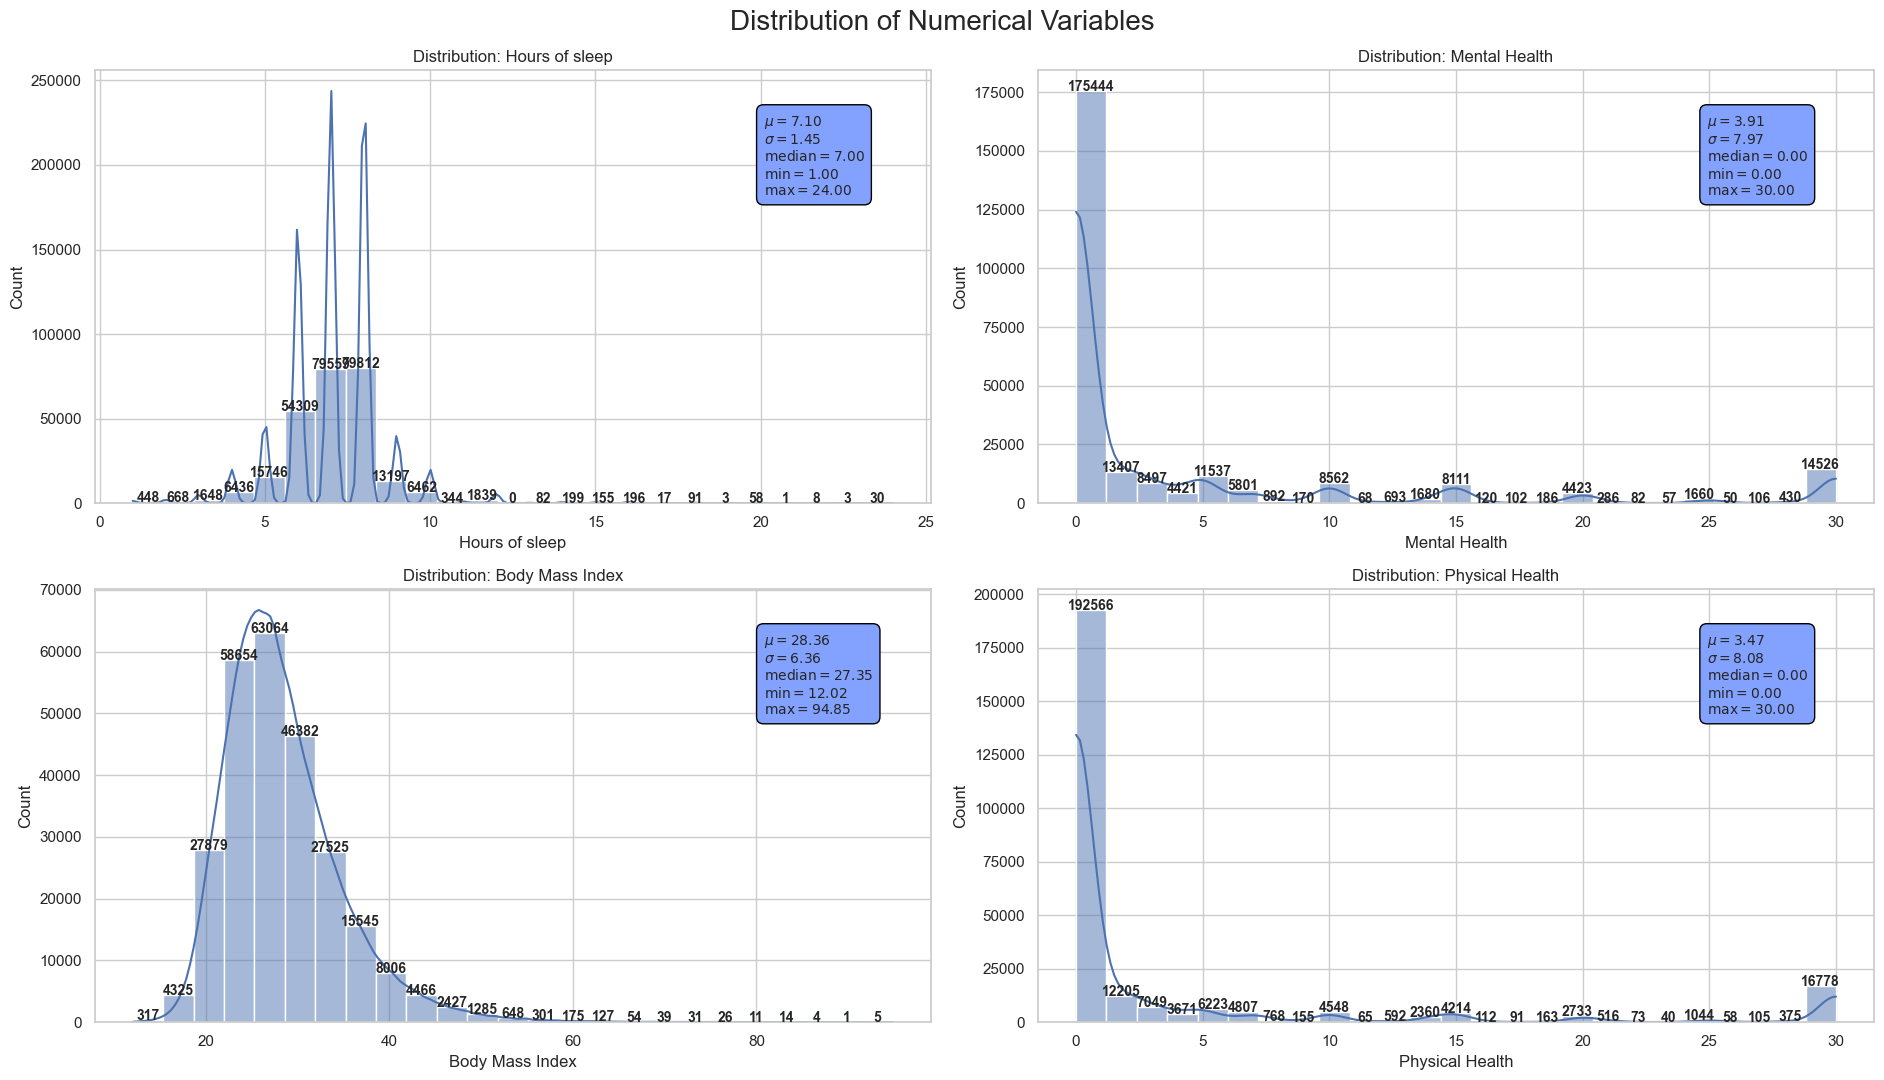

In [12]:
def visualize_numerical_features(dataframe):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(19, 11))

    for i in range(len(numerical_features)):
        sns.histplot(data=dataframe[numerical_features[i]], ax=axes[i//2, i%2], kde=True, palette='Blues', bins=25)
        title = "Distribution: " + numerical_features[i]
        axes[i//2, i%2].set_title(title)

        for j, p in enumerate(axes[i//2, i%2].patches):
            axes[i//2, i%2].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                                    ha='center', fontsize=10, fontweight="bold")
        textstr = '\n'.join((
            r'$\mu=%.2f$' % dataframe[numerical_features[i]].mean(),
            r'$\sigma=%.2f$' % dataframe[numerical_features[i]].std(),
            r'$\mathrm{median}=%.2f$' % np.median(dataframe[numerical_features[i]]),
            r'$\mathrm{min}=%.2f$' % dataframe[numerical_features[i]].min(),
            r'$\mathrm{max}=%.2f$' % dataframe[numerical_features[i]].max()
        ))
        
        axes[i//2, i%2].text(0.8, 0.9, textstr, transform=axes[i//2, i%2].transAxes, fontsize=10, 
                            verticalalignment='top', bbox=dict(boxstyle='round', facecolor = "#83A2FF",edgecolor='black', pad=0.5))
        
    plt.suptitle('Distribution of Numerical Variables', fontsize=20) 
    plt.tight_layout()

visualize_numerical_features(medcenter_df_complete)

### Interpretation of the results 🔍: 

1. **Distribution: Hours of Sleep**
   This histogram displays the frequency of different amounts of sleep recorded in the dataset. It shows several peaks, with the most significant peak around 7 to 8 hours, which is commonly recommended as the healthy amount of sleep for adults. There are also some smaller peaks at lower values, and a few values extend towards the higher end, suggesting some outliers in the data who report much higher sleep durations.

2. **Distribution: Mental Health**
   The histogram for mental health scores shows a steep decline in frequency as the score increases. The highest frequency is at the lower end of the scale, suggesting that a large number of individuals have lower mental health scores, with very few individuals having high scores. As we saw in the heatmap, we have a positive correlation between physical and mental health, suggesting that improvements or declines in one are often mirrored in the other. In fact, it's important to note that lower scores in both physical and mental health metrics are associated with better health outcomes.
   
3. **Distribution: Body Mass Index (BMI)**
   This histogram illustrates the BMI distribution and appears to follow a roughly normal distribution, centered around a BMI that could be within the 'healthy' range according to medical standards. The tail to the right indicates that there are fewer individuals with higher BMIs in the dataset.

4. **Distribution: Physical Health**
   Similar to the mental health histogram, the physical health distribution has a high frequency of lower scores and a rapid decline in frequency as the score increases, showing a distribution skewed to the right. This pattern suggests that lower physical health scores are more common in the dataset.



We see that most of our numerical features attain high skeweness values, indicating an asymmetry in the distribution, as we can see from the graphs above.
It can also be noticed that all values are **positive**, which indicate that the distribution is _skewed to the left_.

The only feature that is almost uniformly distributed is `Hours of Sleep`, all the others are **highly skewed** to the right, with our target variable being the one having the highest skeweness in the entire dataset.
## Considerations

Looking at our data we notice that there are some really weird values in both `Hours of sleep` and `Body Mass Index`:
- For `Hours of sleep` we see that it has a maximum value of 24 and a minimum value of 1. Both values does not make sense, how is the patient sleeping all day and how is he surviving sleeping only 1 hour?
- For `Body Mass Index` we see that we have a maximum value of 94.85; by knowing that a person is considered _severely obese_ with a BMI > 40, having a BMI of 94.85 is just impossible. Also the minimum value for this feature (12.02) is suspicious, knowing that below 18.5 is very underweight for a normal person.

Common sense suggests us that we should set a threshold to determine which of those values are feasible.

The histograms provided also illustrate that the distributions for both `Physical Health` and `Mental Health` variables are highly skewed, with a significant concentration of values at the lower end of the scale. This skewness suggests that the data does not follow a normal distribution, which could be indicative of non-random underlying processes or the presence of many filling or default values. Such a pattern often occurs when zero values are recorded in place of missing or unreported data. We will delve into this peculiarity later to understand the nature of these potential filler values and assess their impact on our data analysis.

## Heatmap of Numerical Features

<Axes: title={'center': 'Heatmap of all numerical features'}>

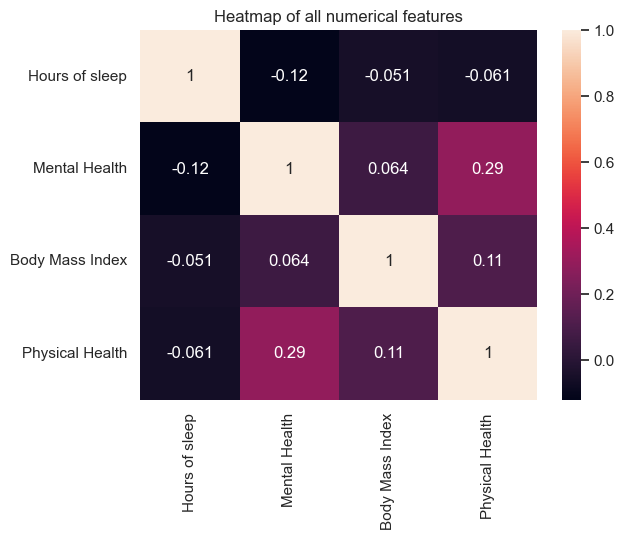

In [13]:
plt.title('Heatmap of all numerical features')
sns.heatmap(data = medcenter_df_complete[numerical_features].corr(numeric_only=True), annot=True, cmap='rocket')

1. **Hours of Sleep**:

- It has a small negative correlation with Mental Health (-0.119688), indicating a slight tendency for people with fewer hours of sleep to have slightly worse mental health.
- It has a small negative correlation with Body Mass Index (-0.051189), suggesting a slight tendency for people with fewer hours of sleep to have a slightly higher BMI.
- It has a small negative correlation with Physical Health (-0.061287), implying a slight tendency for people with fewer hours of sleep to have slightly worse physical health.

2. **Mental Health**:
- It has a small negative correlation with Hours of Sleep (-0.119688), indicating a slight tendency for people with worse mental health to have fewer hours of sleep.
- It has a moderate positive correlation with Physical Health (0.289395), suggesting that better mental health is associated with better physical health.

3. **Body Mass Index**:
- It has a small positive correlation with Mental Health (0.063734), indicating a slight tendency for people with a higher BMI to have slightly better mental health.
- It has a small positive correlation with Physical Health (0.110544), suggesting that a higher BMI is associated with better physical health.

4. **Physical Health**:
- It has a small positive correlation with both Mental Health (0.289395) and Body Mass Index (0.110544), indicating that better physical health is associated with better mental health and a higher BMI to some extent.






## Bivariate Analysis 🔗
## Comparing Categorical Variables with the Target Variable using Boxplots

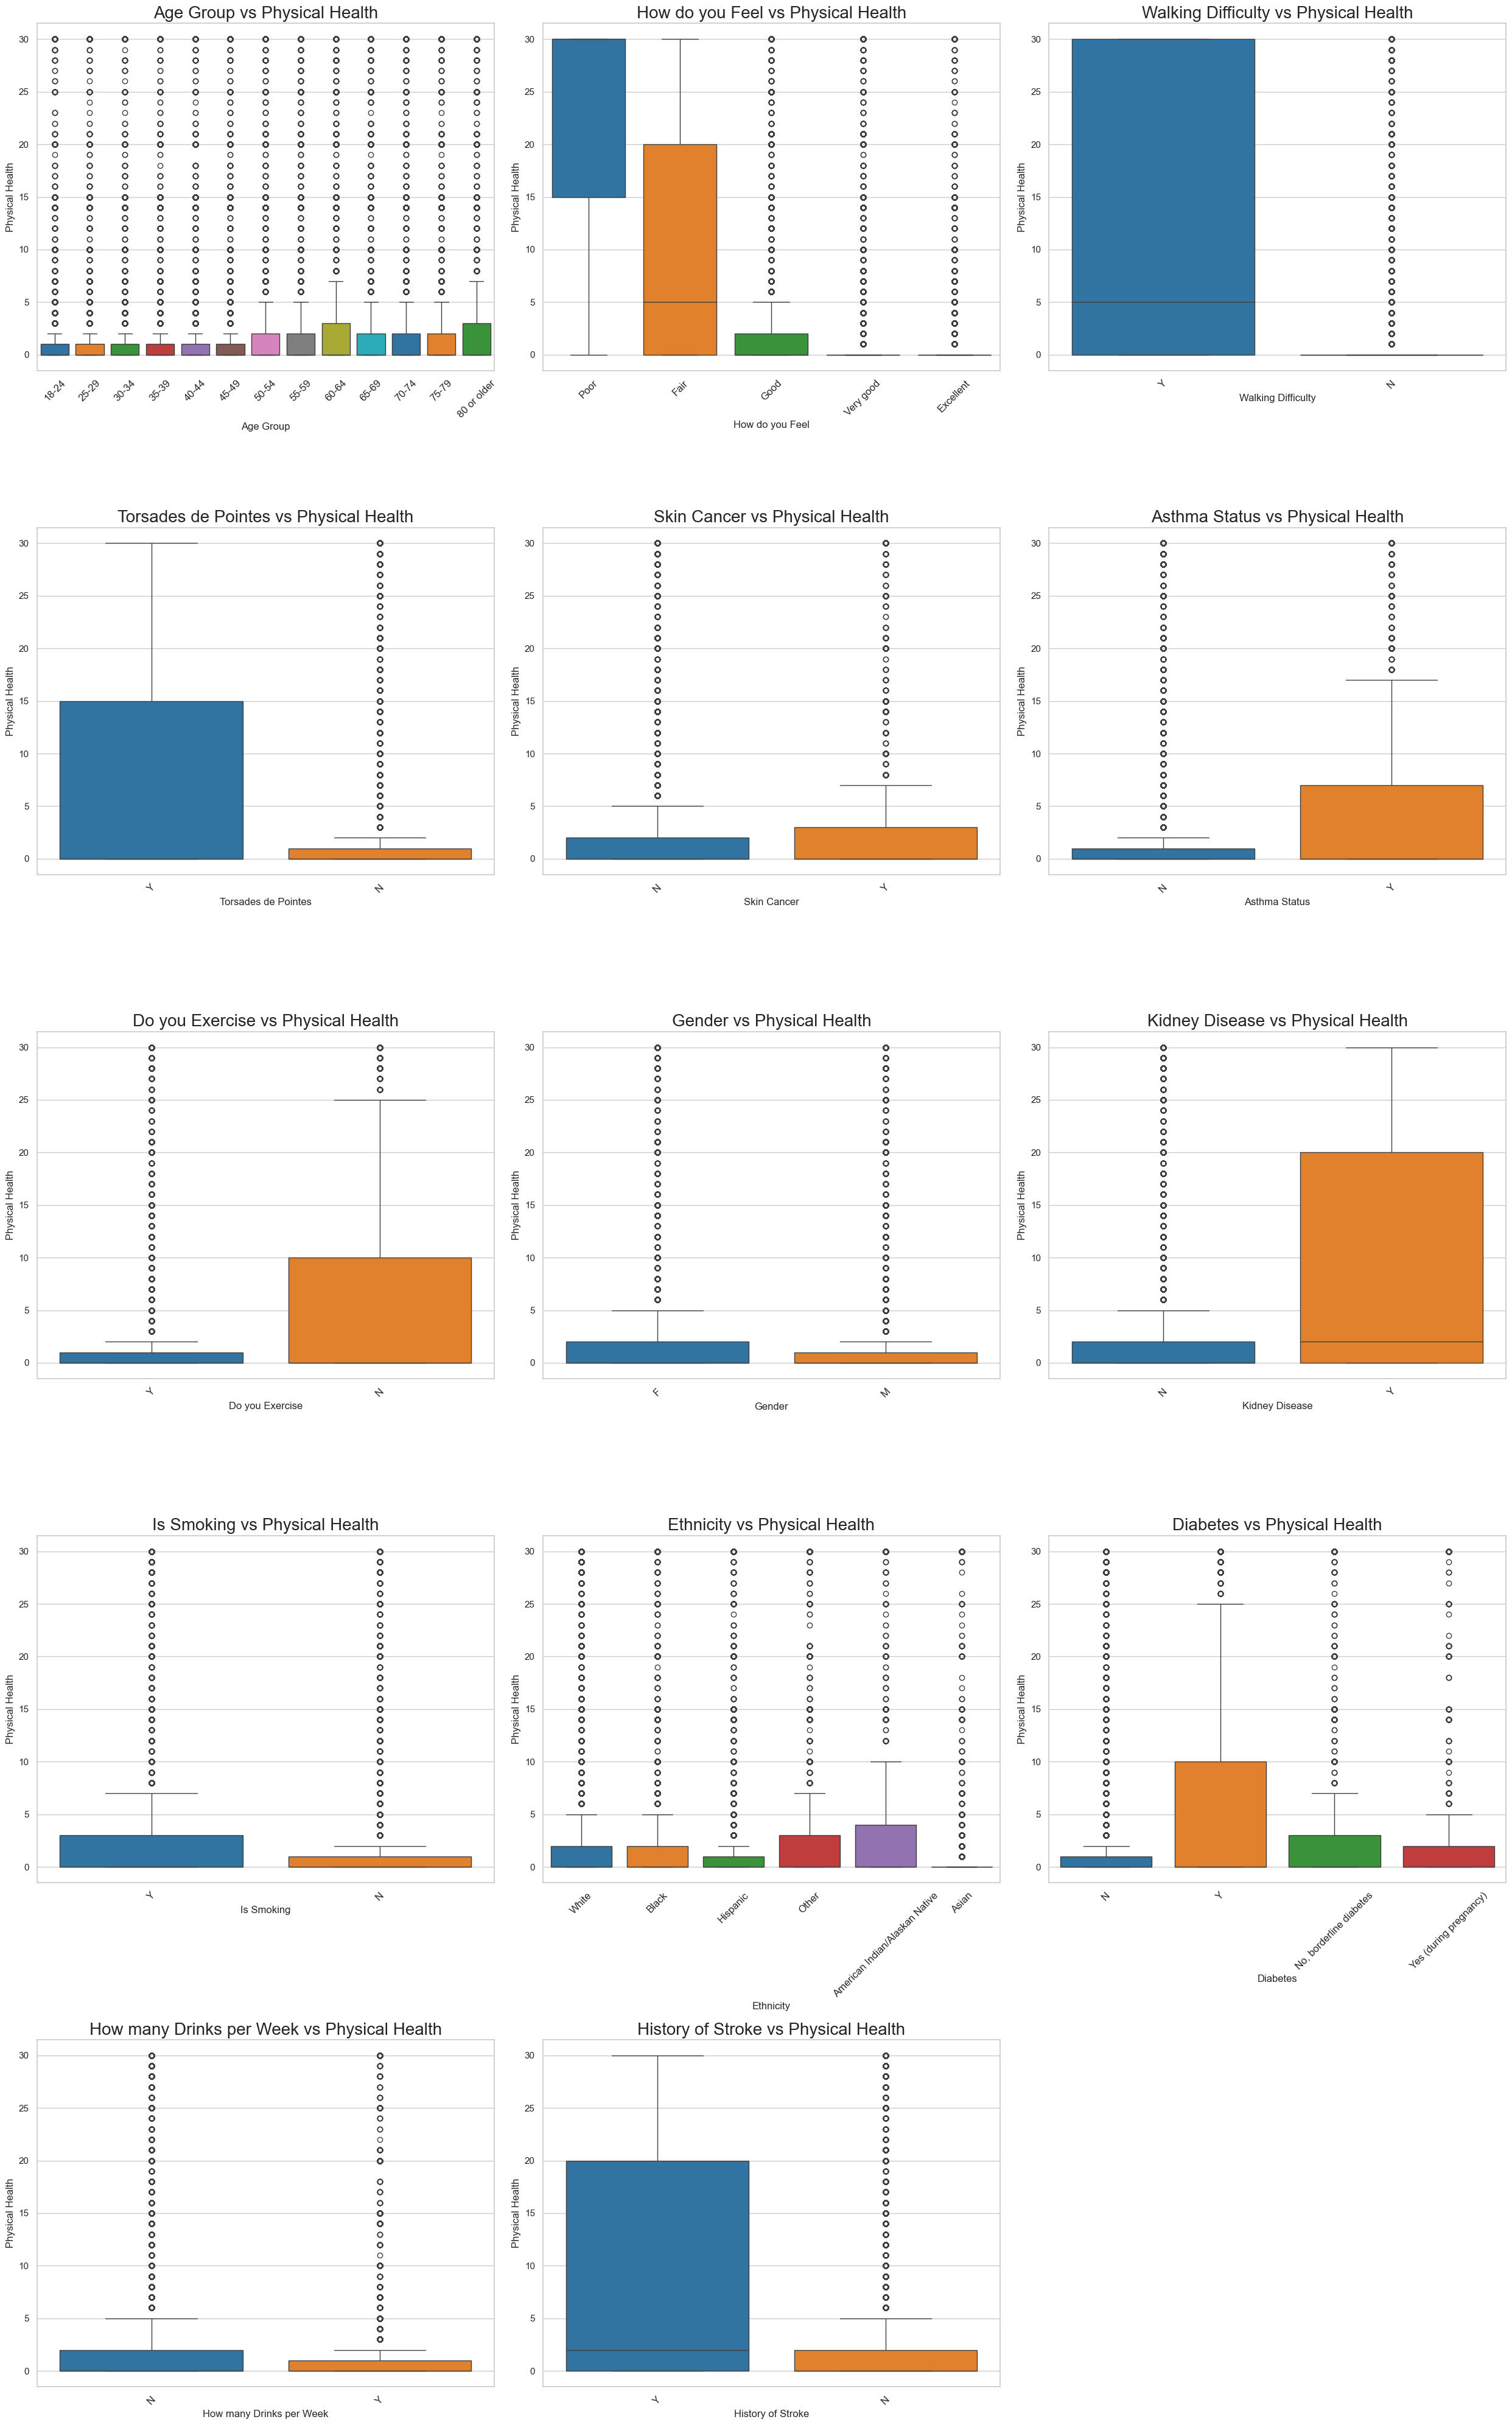

In [14]:
fig, axes = plt.subplots(5,3, figsize = (25,40))

for i in range(len(categorical_features)):
    if categorical_features[i] == 'Age Group':
        sns.boxplot(data = medcenter_df_complete, y = 'Physical Health', x = categorical_features[i], ax = axes[i//3, i%3], palette = 'tab10', order = sorted(medcenter_df_complete['Age Group'].unique()))
    elif categorical_features[i] == 'How do you Feel':
        sns.boxplot(data = medcenter_df_complete, y = 'Physical Health', x = categorical_features[i], ax = axes[i//3, i%3], palette = 'tab10', order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
    else:
        sns.boxplot(data = medcenter_df_complete, y = 'Physical Health', x = categorical_features[i], palette = 'tab10', ax = axes[i//3, i%3])
        
    axes[i//3, i%3].set_title(f"{categorical_features[i]} vs Physical Health", fontsize = 20)
    axes[i//3, i%3].tick_params(axis='x', labelrotation=45, labelsize = 12)

plt.delaxes(ax = axes[4,2])
plt.tight_layout()

### Interpretation of the results 🔍: 

1. **Age group vs Physical Health**: 

    this graph does not provide any meaningful insight about some correlation between age and physical health. We see that most of the physical health scores are very low, independently from the group age, but we also have tons of outliers without a clear trend.

2. **How do you feel vs Physical Health**: 

    this graph is interesting because it appears that patients feelings are exactly the opposite of their health score. We initially assumed that a high health score meant that the patient was healthy, but from this graph we started questioning this assumption: we see that patients feeling _poor_ have a physical health score above 15, those feeling _fair_ have physical health below 20, and then those feeling _good_, _very good_ and _excellent_ have a physical health score around zero. Note that those last three categories have a huge amount of outliers and how a patient feels is not entirely reliable to assess if their health conditions are good or not. We need to investigate more to see if this feature is not relevant to our analysis, and possibly exclude it because it gives misleading indications to predict our target variable, or we might have to reconsider the meaning of the score `Physical Health` (with a high vaue indicating that the patient is ill and a low value meaning that the patient is healthy).

3. **Walking Difficulty vs Physical Health**:

    we note that those who **don't** have walking difficulty have in average a much lower physical health score, while those who do have walking difficulty span almost all the possible values of physical health, without a clear trend.

4. **Torsades de Pointes vs Physical Health**: 

    also here, in average, those who have torsades the pointes have a higher physical health score than those who aren't affected by this illness.

5. **Skin Cancer vs Physical Health**: 

    this graph is pretty balanced between those who aren't affected by skin cancer and those who do, suggesting that this feature may not be as impactful as the others with respect to our target variable. However also in this case, even if the difference is more subtle, the average physical health score of those who don't have skin cancer is lower than those who have it.

6. **Asthma Status vs Physical Health**: 

    This box plot compares physical health scores between individuals with and without asthma. Individuals without asthma ('N') have a narrow range of low physical health scores with several outliers indicating higher scores. In contrast, those with asthma ('Y') show a wider range of physical health scores, as evidenced by the taller box, and include both lower and higher scores, with the median notably higher than that of the non-asthma group. The presence of outliers in both groups suggests that there are exceptions to the general trend within each category.

7. **Do You Exercise vs Physical Health**:

    The box plot shows physical health scores against exercise habits. Those who don't exercise ('N') have tightly grouped, high physical health scores, suggesting they generally report poorer health. The exercising group ('Y') has a wider spread of scores with a lower median, indicating better self-reported health on average. However, there are several high-scoring outliers in the 'Y' group, which are exceptions, showing that some people who exercise still report poor health. 

8. **Gender vs Physical Health**:

    In this visualization, we see physical health scores laid out by gender. The female group ('F') displays a broader range of physical health scores with a higher median compared to the male group ('M'), indicating that females are reporting worse physical health on average. However, there are outliers in both groups—people far above the median—which means there are both males and females who report poor physical health. These outliers in both gender groups suggest that there are individual variations in reported physical health that go beyond gender differences.

9. **Kidney Disease vs Physical Health**: 

    This box plot contrasts the physical health scores between individuals with and without kidney disease. Those without the disease ('N') generally report lower physical health scores, indicating better health, with a few high-score outliers representing worse health reports. On the other side, individuals with kidney disease ('Y') have a significantly higher median score, suggesting a trend toward poorer health. The spread of scores in this group is also much larger, pointing to a varied experience of health among those with kidney disease. The compact box for those without kidney disease suggests less variability in health perception compared to the wide box for those with the disease, which shows a diverse range of health states.

10. **Is Smoking vs Physical Health**:
    The box plot reveals a small but difference in self-reported physical health between smokers and non-smokers. The medians are close, suggesting that smoking status alone does not dramatically differentiate physical health outcomes in this sample. The distribution and outliers indicate variability within both groups, emphasizing that factors other than smoking may influence individuals' physical health reports.

11. **Ethnicity vs Physical Health**:
    The box plot compares physical health scores across different ethnic groups. The median scores are fairly similar for 'White', 'Black', and 'Hispanic', suggesting minor differences in reported physical health across these groups. The 'Other' and 'Asian' categories show a slightly higher median, which could indicate a perception of poorer health, while the 'Non-Native' group has a wider range of scores. All groups have outliers with high scores, indicating individuals reporting poor health regardless of ethnicity. The data implies that ethnicity, in this sample, has a relatively small impact on physical health scores.

12. **Diabetes vs Physical Health**:
    The graph subtly indicates that diabetes may influence physical health, but the modest variation in medians suggests its impact is not pronounced in this dataset. The overlap and presence of outliers in all groups hint at a complex interplay of factors affecting physical health beyond diabetes alone.

13. **How Many Drinks per Week vs Physical Health**:
    The graph indicates a slight difference in physical health scores between those who don't drink and those who do. Both groups have outliers showing some individuals reporting poor health, but the overall scores are quite close, suggesting that the number of drinks consumed per week is not a strong indicator of physical health in this dataset.

14. **History of Stroke vs Physical Health**:
    The graph presents physical health scores, showing a notably wider range of values for individuals with a history of stroke ('Y') compared to those without ('N'). The 'N' group has outliers on the higher end, which are the individual points displayed beyond the top whisker. Moreover, the 'N' group's median score is not visible, suggesting it may be very low, while the 'Y' group's median is around 3, indicating a higher central tendency of physical health scores in this group.

## Other important Distributions 📉

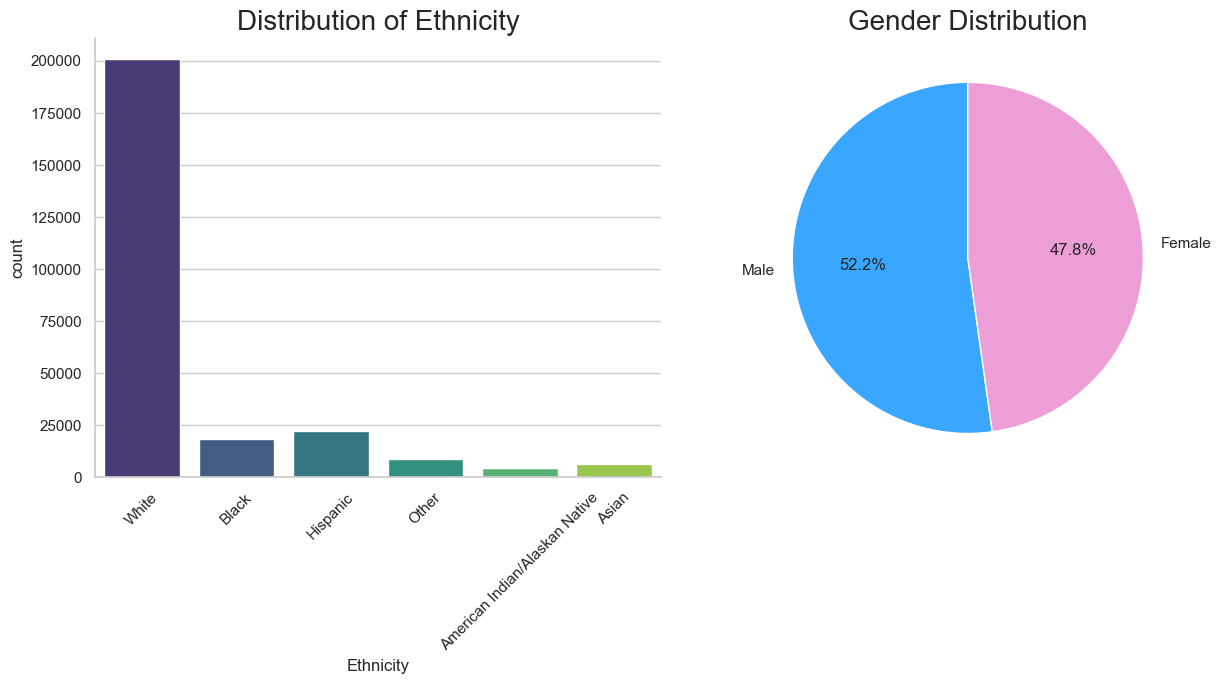

In [15]:
fig, axes = plt.subplots(1,2, figsize = (13,7))

sns.countplot(data = medcenter_df_complete, x = 'Ethnicity', palette = 'viridis', ax = axes[0])
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].set_title("Distribution of Ethnicity", fontsize = 20)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

plt.title("Gender Distribution", fontsize = 20)
plt.pie(medcenter_df_complete['Gender'].value_counts(), autopct='%1.1f%%', labels=['Male', 'Female'], startangle = 90, colors = ["#39A7FF","#ED9ED6"])
plt.tight_layout()


### Interpretation of the results 🔍: 

**Distribution of Ethnicity (Bar Chart):**
- The bar chart shows the counts of individuals from different ethnic groups within a dataset.
- The "White" category has the highest count, significantly more than other groups, suggesting a dataset predominantly composed of individuals identified as White.
- The other ethnic groups (Black, Hispanic, Other, American Indian/Alaskan Native, Asian) have much lower counts, indicating underrepresentation compared to the White category.
- Such a distribution might affect the fairness and performance of AI systems trained on this dataset, as they may become less accurate for underrepresented groups.

**Gender Distribution (Pie Chart):**
- The pie chart illustrates the percentage of males and females in the dataset.
- Males make up 52.2% of the dataset, and females 47.8%.
- This distribution is relatively balanced, but depending on the AI application, even a slight imbalance could result in gender bias.

**AI Ethics Implications:**
- **Bias**: If an AI system is trained on these data, it may perform better for the majority group (White and Male) due to more extensive data availability, resulting in biased performance against other groups.
- **Representation**: The underrepresentation of certain ethnic groups can lead to AI systems that are less effective or fair for those groups.
- **Fairness**: It's important for AI to be fair and equitable, which requires diverse and balanced datasets to ensure the AI doesn't inherit or perpetuate existing biases.
- **Performance**: AI performance may not be uniform across different demographics if the training data is not representative of the population the AI will serve.


## Investigating the Skeweness of our numerical Features

We are going to compute the **skweness** for each column of the numerical data present in our dataset.

- If the skeweness is between -0.5 and 0.5 the data are **fairly simmetrical**
- If the skeweness is between -1 and -0.5 or between 0.5 and 1, the data are **moderately skewed**
- If the skeweness is less than -1 or greater than 1, the data are **highly skewed**

In [16]:
medcenter_df_complete[numerical_features].skew().sort_values(ascending = False)

Physical Health    2.544864
Mental Health      2.326971
Body Mass Index    1.324690
Hours of sleep     0.729144
dtype: float64

We see that most of our numerical features attain high skeweness values, indicating an asymmetry in the distribution, as we can see from the graphs above.
It can also be noticed that all values are **positive**, which indicate that the distribution is _skewed to the left_.

The only feature that is almost uniformly distributed is `Hours of Sleep`, all the others are **highly skewed** to the right, with our target variable being the one having the highest skeweness in the entire dataset.
## Considerations ✍️

We can't say much about `Physical Health` and `Mental Health` yet, but by looking at our data we notice that there are some really weird values in both `Hours of sleep` and `Body Mass Index`:
- For `Hours of sleep` we see that it has a maximum value of 24 and a minimum value of 1. Both values does not make sense, how is the patient sleeping all day and how is he surviving sleeping only 1 hour?
- For `Body Mass Index` we see that we have a maximum value of 94.85; by knowing that a person is considered _severely obese_ with a BMI > 40, having a BMI of 94.85 is just impossible. Also the minimum value for this feature (12.02) is suspicious, knowing that below 18.5 is very underweight for a normal person.

Common sense suggests us that we should set a threshold to determine which of those values are feasible.

## Handling Skewed Distributions

We'll experiment a mathematical transformation on our skewed data to see if we can manage to adjust the distributions to a more or less normal distribution. We do it because some algorithms, like linear regression models benefit from a normal distribution.

Since our data is **Right Skewed** we use the _Log Transform_.

In [17]:
def logTransform(data, feature):
    # Create a copy of the original DataFrame
    data_copy = data.copy()

    # Apply the log transformation to the specified column
    data_copy[feature] = np.log1p(data_copy[feature])

    # Plot the distribution before and after transformation
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(data[feature], kde=True, color="red")

    plt.subplot(1, 2, 2)
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(data_copy[feature], bins=20, kde=True, legend=False)
    plt.xlabel(feature)
    plt.show()

    return data_copy

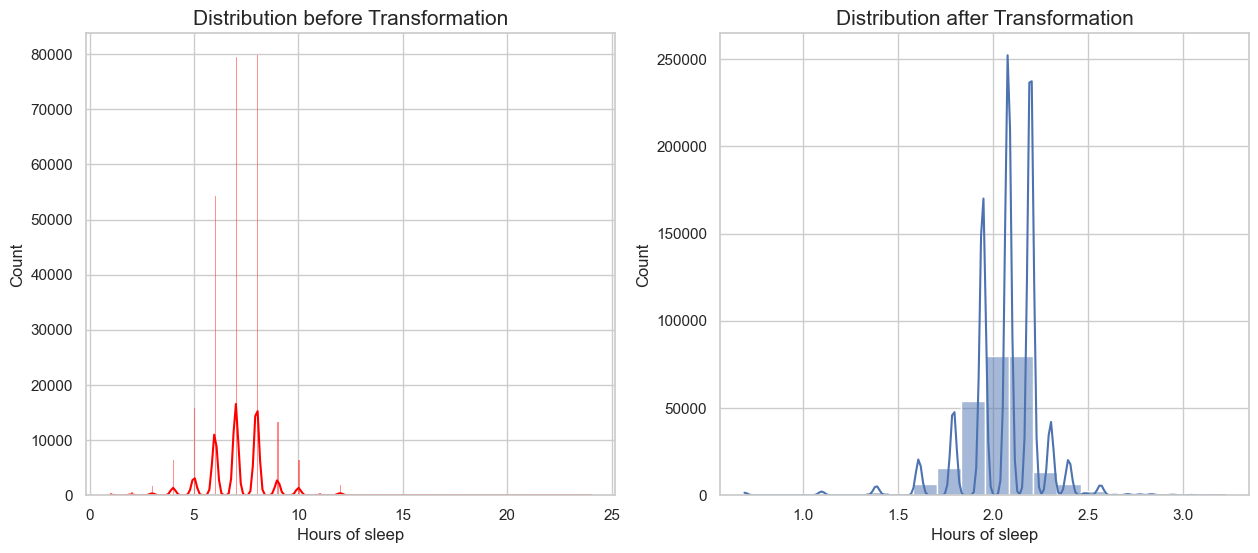

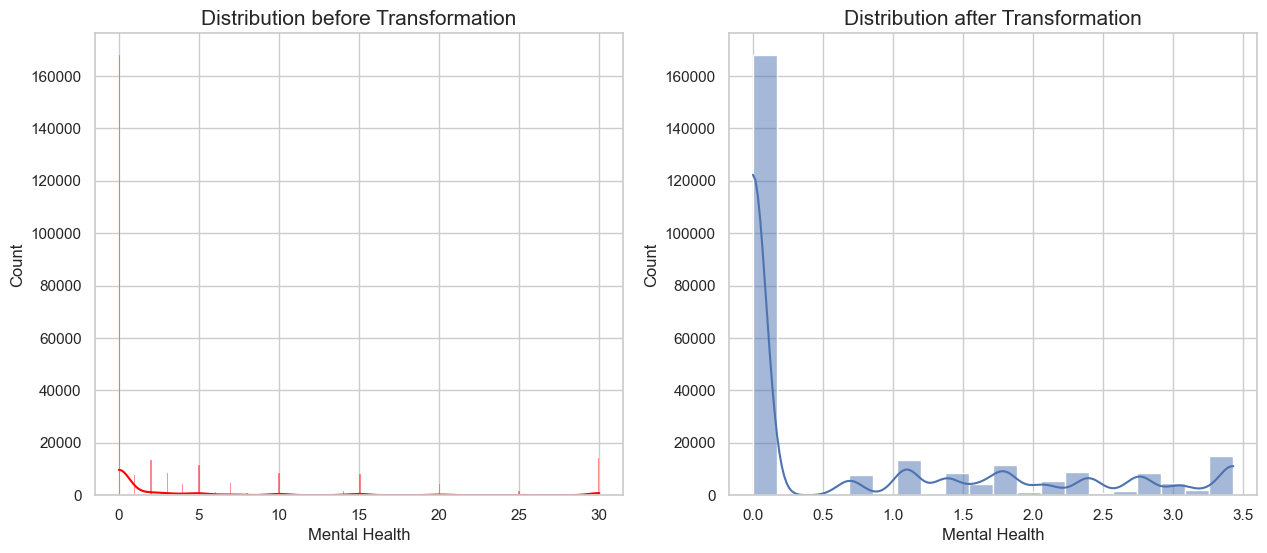

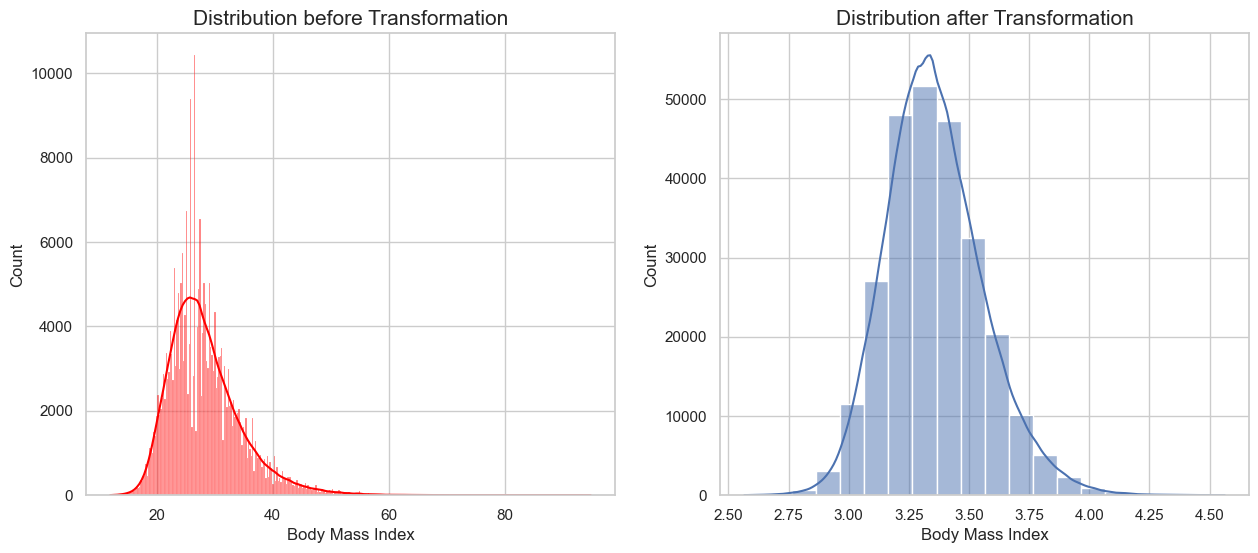

In [18]:
for feature in numerical_features[:3]:
    logTransform(medcenter_df_complete, feature)

In the process of tackling the challenges posed by skewed numerical variables in our dataset, our primary objective was to mitigate the right skewness observed in the three numerical features while ensuring an enhancement in the performance of our machine learning models. However, after a thorough analysis and experimentation, the decision to abstain from implementing the log transformation was made based on several critical observations.

- **High Skewness Persistence**:
Despite the initial intuition that log transformation would alleviate the right skewness in the numerical variables, it was found that the skewness remained excessively high even after applying the transformation. The severity of skewness suggested that the logarithmic operation might not be sufficient to normalize the distribution effectively.

- **Worsening Model Performance**:
Unexpectedly, the application of the log transformation led to a deterioration in the performance of our machine learning models. This counterintuitive outcome raised concerns about the compatibility of the log transformation with the characteristics of our dataset. The observed decline in model performance prompted a reevaluation of the appropriateness of this transformation for our specific context.

- **Preservation of Information**:
Log transformation, while often valuable for addressing skewness, has the inherent characteristic of compressing information in the lower range of values. In situations where the distribution is highly skewed, this compression may result in loss of important information. Given the nature of our dataset, preserving the integrity of the original numerical values was deemed crucial for the accurate representation of the underlying patterns.

In light of these considerations, the decision was made to forgo the implementation of the log transformation. This choice aims to maintain the fidelity of the original dataset, avoid potential information loss, and prevent adverse effects on the machine learning models. 

# Data Preprocessing ⚙️

## Some considerations before the Preprocessing

- There are **no missing values**
- There is a **vast majority of categorical features**
- There are only 4 numerical features: [`Hours of sleep`, `Mental Health`, `Body Mass Index`, `Physical Health`]

We saw that some important features have **extremely skewed distributions**, including our target variable, and we can identify a pattern in this skewness: `Mental Health` and `Physical Health` both have most of their data with a value of 0. This might be due to the fact that those are filling values, but we can't be sure about it and removing those values might mislead the predictions of our models. Furthermore, removing the 0 values of both these columns means **reducing drastically** the size of our dataset. 

For this reason we decided to first build our models on the entire dataset, removing only the outliers identified using our domain knowledge, and then build the same models on a reduced dataframe with the 0 values of `Physical Health` and `Mental Health` removed, to compare our results with a less skewed dataset.


In [19]:
medcenter_df_complete[numerical_features].kurt().sort_values(ascending = False)

Hours of sleep     8.276485
Physical Health    5.190173
Mental Health      4.379137
Body Mass Index    3.816084
dtype: float64

As we expected, our features (except maybe the BMI) all have high values. The specific term is **Leptokurtic**, a type of distribution having kurtosis > 3. A consequence of having lots of outliers is the _skinniness_ of the graph: the horizontal axis gets stretched, making the bulk of the data appear in a narrow vertical range.

We can infer that `Hours of sleep` is a feature presenting a really high number of outliers.


### Encoding Categorical Variables 🔂
Label encoding and one-hot encoding are techniques used to convert categorical data into numerical form, facilitating its use in machine learning algorithms. Label encoding assigns each unique category a numerical value, maintaining the order but potentially implying a numerical relationship where none exists. One-hot encoding, in contrast, creates separate binary columns for each category, eliminating ordinal implications but increasing the dimensionality of the dataset.

In our model, we have chosen to apply **Label Encoder** to the variables `How do you Feel`, `Age Group`, and `Diabetes` due to the inherent ordinal nature of their values, where a hierarchical structure can be discerned. For the variable `Gender`, we treat it as a binary variable. Additionally, we employ **One-hot encoding** for all binary variables, including 'Gender', translating 'Y' and 'N' to 1 and 0, respectively. This approach ensures a more accurate representation of these categorical variables for our model.
Ethnicity ? get dummies ? 

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Columns to be one-hot encoded
onehot_encoded_columns = ['Gender', 'Ethnicity', 'Walking Difficulty', 'Skin Cancer', 'Torsades de Pointes', 'Asthma Status', 'Do you Exercise', 'Kidney Disease','Is Smoking','History of Stroke', 'How many Drinks per Week']
# Columns to be label encoded
label_encoded_columns = ["How do you Feel", "Age Group", "Diabetes"]

# Applying OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # 'drop' parameter is used to avoid multicollinearity
for column in onehot_encoded_columns:
    # The encoder returns a 2D array, which we need to convert to a DataFrame
    onehot_df = pd.DataFrame(encoder.fit_transform(medcenter_df_complete[[column]]))
    
    # The new columns will be named after the classes detected by the encoder
    onehot_df.columns = encoder.get_feature_names_out([column])
    
    # Drop the original column from the main DataFrame
    medcenter_df_complete.drop([column], axis=1, inplace=True)
    
    # Concatenate the one-hot encoded DataFrame to the main one
    medcenter_df_complete = pd.concat([medcenter_df_complete, onehot_df], axis=1)

# Applying LabelEncoder
le = LabelEncoder()
for column in label_encoded_columns:
    medcenter_df_complete[column] = le.fit_transform(medcenter_df_complete[column])

medcenter_df_complete.head()


,Hours of sleep,How do you Feel,Diabetes,Age Group,Mental Health,Body Mass Index,Physical Health,Gender_M,Ethnicity_Asian,Ethnicity_Black,...,Ethnicity_White,Walking Difficulty_Y,Skin Cancer_Y,Torsades de Pointes_Y,Asthma Status_Y,Do you Exercise_Y,Kidney Disease_Y,Is Smoking_Y,History of Stroke_Y,How many Drinks per Week_Y
0,10.0,2,0,12,0.0,15.55,7.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,7.0,1,2,9,0.0,38.62,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.0,2,0,8,0.0,21.62,3.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,2,0,9,0.0,22.14,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8.0,1,2,10,0.0,43.05,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


<Axes: >

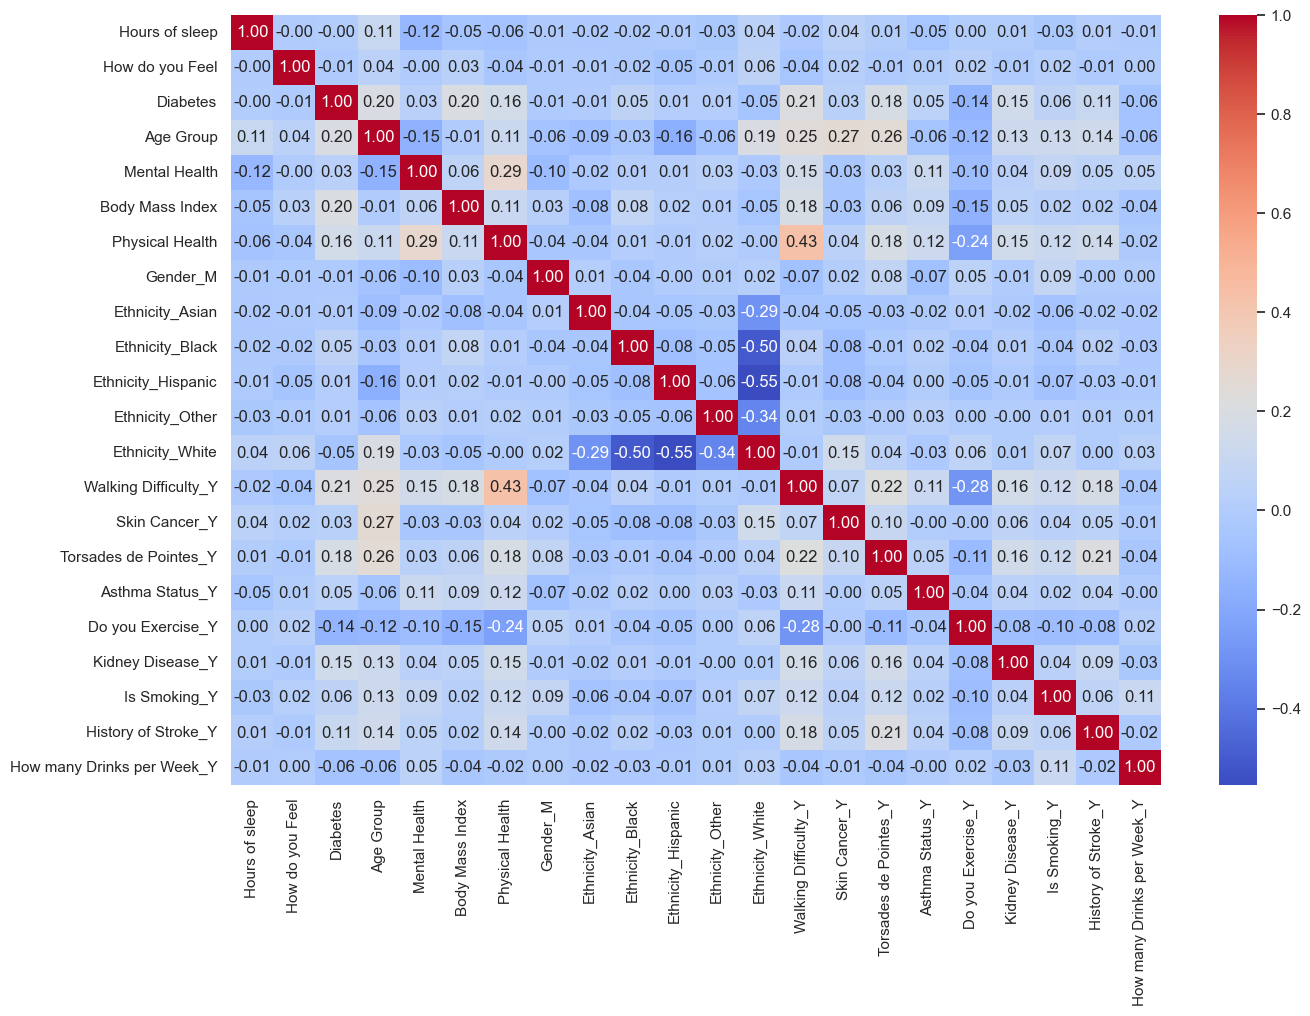

In [21]:
# heatmap complete
plt.figure(figsize=(15, 10))
sns.heatmap(medcenter_df_complete.corr(), annot=True, cmap="coolwarm", fmt='.2f', cbar=True)

### Interpretation of the results 🔍: 
1. `How do you Feel` has little to none correlation with any other feature in the dataset, hence we can consider removing it.

2. `Walking Difficulty` has a positive correlation with `Age Group` at 0.25, indicating that as age increases, walking difficulties tend to be more prevalent.

3. `Diabetes` and `Body Mass Index` have a positive correlation of 0.22, suggesting that higher BMI values may be associated with an increased likelihood of diabetes.

4. `Walking Difficulty` and `Torsades de Pointes` have a positive correlation of 0.22, suggesting that individuals who experience difficulty walking might also have a higher likelihood of encountering Torsades de Pointes, a specific heart arrhythmia. 

5. `How do you Feel` and `Walking Difficulty` show a strong negative correlation of -0.42, suggesting that individuals who have a higher sense of well-being report fewer walking difficulties.

6. `Age Group` has a positive correlation with `Kidney Disease`, `Diabetes`, `Skin Cancer`, and `Torsades de Pointes`, suggesting that the prevalence of these health conditions tends to increase as the population gets older. 

7.  `How do you Feel` and  `Mental Health` have a negative correlation of -0.24, suggesting that individuals that feels better have a higher level of mental well-being.

8. `Torsades de Pointes` and `History of Stroke` have a positive correlation, suggesting that individuals that have encountered Torsades de Pointes may be at an increased risk to encounter the other. 

9. `Do you Exercise` and `Walking Difficulty` have a negative correlation, suggesting that those individuals who exercise report less walking difficulties.

10. Each `Ethnicity` group seem to be uncorrelated to any other meaningful feature that can help us predict our target variable. We can consider removing it.

## Handling Outliers 🔬

Outliers removal is a key step in data preprocessing, ensuring accuracy and reliability in statistical analyses and predictive modeling. It helps in mitigating the skewing effect of extreme values on key metrics like mean and standard deviation. By eliminating or adjusting outliers, we can reach more robust and valid conclusions.

An important measure of shape we can compute is the **Kurtosis**. It measures wether our dataset is heavy-tailed or light-tailed compared to a normal distribution.

- High kurtosis means that our distribution is **heavy-tailed** with **lots of outliers**
- Low kurtosis means that our distribution is **light-tailed** with **few outliers**

In [22]:
# Removing Hours of sleep Outliers
medcenter_df_complete = medcenter_df_complete[~(medcenter_df_complete['Hours of sleep'] > 14)] 

# Removing Body Mass Index Outliers
medcenter_df_complete = medcenter_df_complete[~(medcenter_df_complete['Body Mass Index'] > 50)]

We decided to proceed like this because in examining the boxplots of the 'Hours of sleep' we observe outliers that suggest that some individuals are sleeping 24 hours a day, which is biologically implausible for a regular sleep pattern and may indicate data entry errors or extreme cases that need to be validated. Similarly, the 'BMI' boxplot shows outliers with extremely high values or extremely low values that may be due to incorrect data entry or rare medical conditions. Given these unusual values, we should consider removing these outliers to ensure the integrity of any analysis conducted on this dataset.

### Now let's interpret our target variable ! 🔬

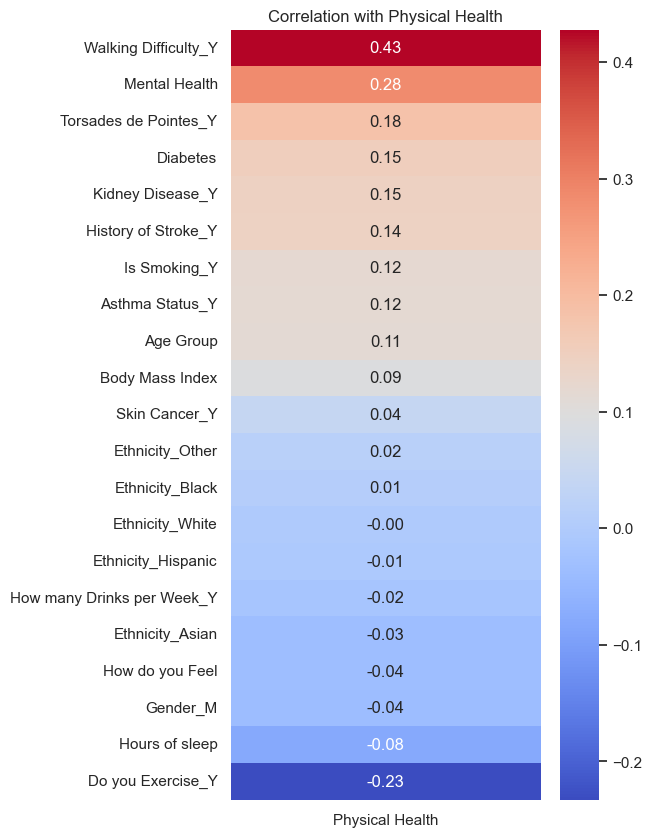

In [23]:
# heatmap with only the target variable
corr_medcenter_df = medcenter_df_complete.corr()

# Define the target variable
target_variable = 'Physical Health'

# Compute the correlation with the target variable
target_corr = corr_medcenter_df[target_variable].drop(target_variable)

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Plot a heatmap of the correlations with the target variable
plt.figure(figsize=(5, 10))
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=True)
plt.title(f'Correlation with {target_variable}')
plt.show()

### Interpretation of the results 🔍: 

This chart represents a correlation matrix, specifically correlating various features with physical health. The color coding indicates the direction and strength of the correlation between each feature and physical health. Features colored in red indicate a positive correlation, meaning that as the value of the feature increases, the physical health metric tends to increase as well. Conversely, features in blue indicate a negative correlation, signifying that as the feature's value increases, the physical health metric tends to decrease. The intensity of the color correlates with the strength of the relationship; darker shades represent stronger correlations. The numeric value beside each feature quantifies this correlation, with values closer to 1 or -1 indicating a stronger positive or negative correlation, respectively.

From the graph:

1. `Walking Difficulty` has a positive correlation of 0.43 with 'Physical Health', which means that as difficulty in walking increases, physical health worsens.
2. `Mental Health` shows a positive correlation of 0.28, indicating that worse mental health is associated with poorer physical health.
4. `Do you Exercise` has a negative correlation of -0.23, suggesting that individuals who exercise tend to have a better (lower) 'Physical Health' score.


Looking at the correlations with our target variable, we can also observe that the columns 'Ethnicity Black', 'Ethnicity Asian', 'Gender M', 'Ethnicity Hispanic', 'Ethnicity Other', and 'Ethnicity White' have a minimal impact on the outcome. Their negligible correlation  indicate that these variables do not hold substantial predictive value. Therefore, to enhance the model's focus and computational efficiency, we have decided to exclude these columns from further analysis.

In [24]:
column_to_drop = ['Ethnicity_Black','Ethnicity_Asian','Gender_M','Ethnicity_Hispanic',  'Ethnicity_Other', 'Ethnicity_White', 'Skin Cancer_Y','How many Drinks per Week_Y']
medcenter_df_complete.drop(column_to_drop, axis = 1, inplace=True)  

## Partitioning the Dataset into Train and Test Set 🔧

Dividing the dataset into a train and test set is an important step in machine learning. The train set is used to train the model,  while the testing segment is utilized to assess how well the model performs with data it hasn't encountered before.
This division is vital to mitigate the risk of **overfitting**, so to avoid that our model becomes excessively attuned to the training data, impairing its ability to adapt to new, unseen data effectively.
We used the common split ratio 80/20, where 80% of the data is allocated for training purposes and the remaining 20% is set aside for testing.
In this process, it's essential to remove the target variable from the training data. In our case, the column representing `Physical Health` is what we aim to predict. Thus, we exclude it from the training set to ensure our model learns to predict it based solely on the other features. This approach provides a more realistic evaluation of the model's predictive capabilities on new data.


In [25]:
from sklearn.model_selection import train_test_split


X = medcenter_df_complete.drop('Physical Health', axis=1)
y = medcenter_df_complete['Physical Health']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

1. The dataset is split into features (X) and the target variable (y), with 'X' containing all the predictors after dropping 'Physical Health', and 'y' representing the 'Physical Health' variable which is our continuous outcome of interest.
2. The `train_test_split` function is then used to further divide the dataset into training and test subsets, with `X_train` and `y_train` serving as the training data for the model to learn from, and `X_test` and `y_test` reserved as the test data to evaluate the model's performance.
3. The `test_size=0.2` argument specifies that 20% of the data will be set aside for testing, ensuring that the model is validated on unseen data, while `random_state=42` ensures that the split is reproducible, giving the same division of data if the code is run multiple times.

### Scaling 📚
Scaling numerical variables using a method like StandardScaler is a crucial step in preparing data for many machine learning models. This process adjusts the range of different features to a standard scale, making sure that no single feature dominates the model due to its larger numeric range. In essence, scaling ensures that each feature contributes equally to the model's predictions, preventing bias towards variables simply because they have larger values. This equal footing is vital for models that rely on the relative sizes of features, ensuring a fair comparison across them. 

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Only transform the test data using the already fitted scaler
X_test = scaler.transform(X_test)

# Now X_train has scaled columns and X_test has columns scaled using the training data statistics


# Regression 🔢
In our study, we aim to predict the 'Physical Health' status of individuals based on a range of factors such as age, BMI, lifestyle habits, and medical history. The choice of regression analysis as our modeling approach is driven by the continuous nature of our target variable, `Physical Health`, which quantifies the health status of an individual. 
Regression is well-suited for this task as it excels in predicting continuous outcomes and it also allows us to not only predict the physical health score but also to understand the relationship and significance of each factor contributing to health outcomes. For instance, through regression analysis, we can quantify the impact of variables like smoking status or BMI on physical health, offering valuable insights into health determinants. The flexibility and interpretability of regression models make them an ideal choice for our study!


In [27]:
# Function to evaluate or regression models

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_score(reg, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = reg.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred):.3f}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred):.3f}")
        print(f"R-squared: {r2_score(y_train, pred):.3f}")
        
    elif not train:
        pred = reg.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred):.3f}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred):.3f}")
        print(f"R-squared: {r2_score(y_test, pred):.3f}")



## Decision Tree

We decided to implement decision trees for our regression problem because these models adaptly capture non-linear relationships by partitioning the input feature space into distinct regions, offering considerable flexibility. Nonetheless, hyperparameter tuning is essential to mitigate overfitting and ensure a robust performance.

We adequately prepared the dataset performing feature scaling and log transformation on our skewed distributions.

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

print_score(tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score(tree_reg, X_train, y_train, X_test, y_test, train=False)

decision_tree_mae = mean_absolute_error(y_test, tree_reg.predict(X_test))
decision_tree_r2 = r2_score(y_test, tree_reg.predict(X_test))

Train Result:
Mean Squared Error: 1.189
Mean Absolute Error: 0.155
R-squared: 0.981
Test Result:
Mean Squared Error: 78.163
Mean Absolute Error: 4.130
R-squared: -0.216


**Results Interpretation without tuning the model**
The results of this model show us a clear case of overfitting. In the training phase, our decision tree achieved impressively low error rates with an MSE of 1.146 and an MAE of 0.153, along with an R-squared of 0.982, indicating a near-perfect fit to the training data. However, when applied to the test set, the performance dropped drastically, with an MSE jumping to 78.484 and MAE to 4.130, while the R-squared plummeted to -0.217. This negative R-squared value is particularly concerning as it suggests the model is doing worse than a basic model that would simply predict the average of the dependent variable for all observations. Moving forward, it's clear that the model needs to be adjusted to improve its generalization to new data, potentially through hyperparameter tuning.

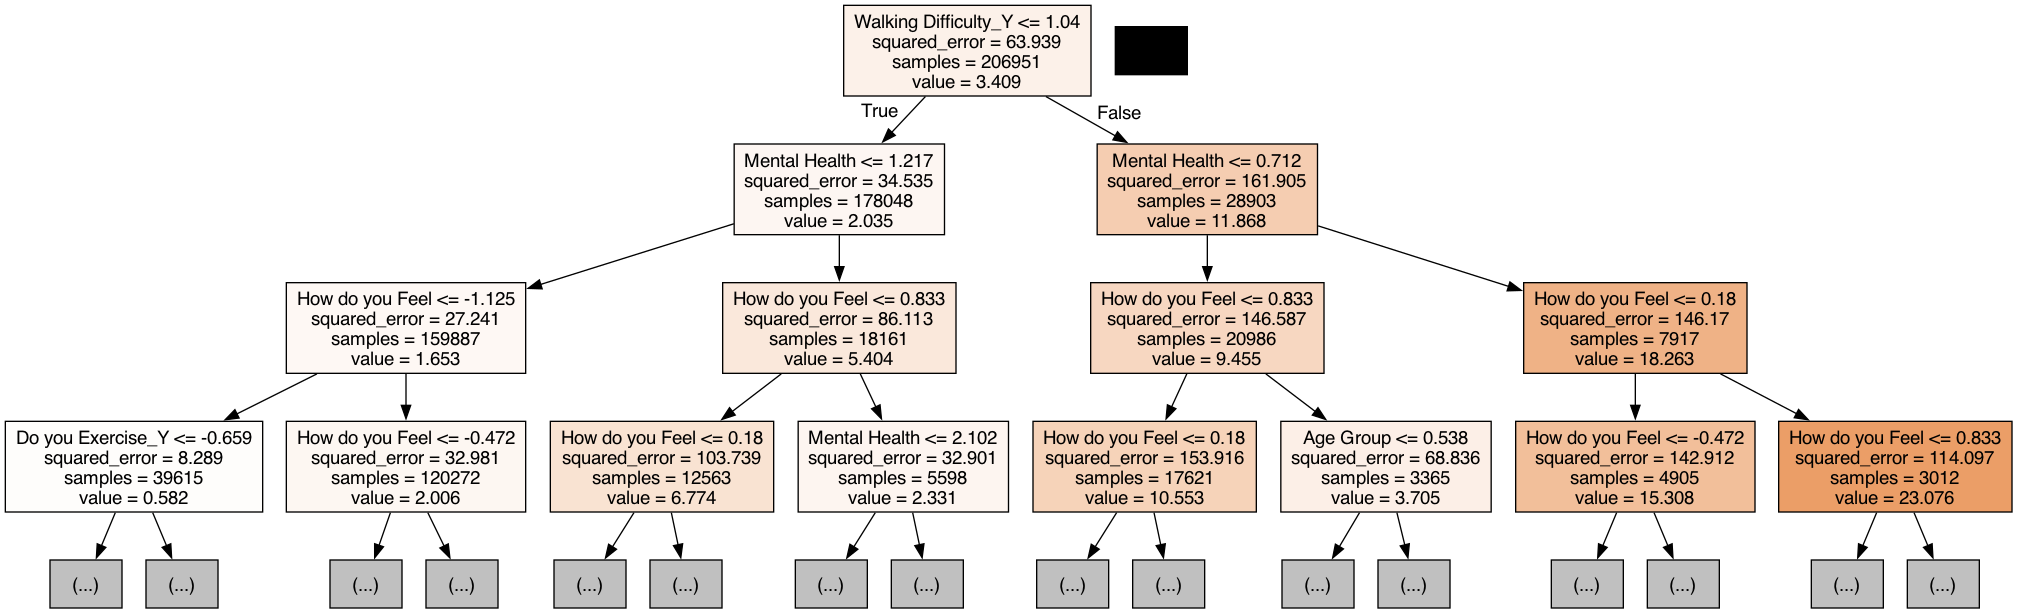

In [29]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X.columns)

dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=X.columns, filled=True, max_depth=3)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

**Visual Interpretation**:
We start from the root node that represents the entire dataset and shows the feature and threshold used to make the first split. Each internal node has represents a decision based on a feature and a threshold. The tree splits data into subsets based on these decisions as it moves from the root to the leaves. The left branch represents the condition where the feature is less than the threshold and the right branch represents the opposite condition. Darker colors of the nodes represent higher predicted values.

Our graph is very deep and too difficult to visualize in its entirety, so we only selected a small subset of it. Due to this fact we can't see terminal nodes, representing the predicted values for the samples that reach that node. The features closer to the root are those more important in making the predictions.

### Hyperparameter Tuning


Parameter tuning is a crucial step in the process of building a predictive model, as it directly impacts the model's ability to generalize to new data. It involves systematically searching for the optimal set of parameters for a particular predictive model in order to improve its performance. The process works by defining a parameter grid that outlines a range of values to test for each parameter. Techniques like Grid Search exhaustively try out all possible combinations of the parameters specified in the grid. In this case, various values for 'max_depth', 'min_samples_split', 'min_samples_leaf', and 'max_features' are considered.

The Grid Search algorithm runs the model for each combination of parameters, using cross-validation to evaluate the model's performance. Cross-validation involves dividing the dataset into a set number of "folds", training the model on some of these folds, and validating it on the remaining ones. This process is repeated multiple times so that each fold serves as the validation set once. The performance metric is averaged over the folds to get a comprehensive measure of the model's predictive power.

Once all combinations have been evaluated, Grid Search selects the parameter set that yields the best average performance across all the cross-validation folds. By doing this, parameter tuning helps in identifying the configuration that makes the model perform at its best, balancing the trade-off between bias and variance, and ultimately leading to more accurate and robust predictions on unseen data.

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=tree_reg, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=1
    )

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

decision_tree_tuned_mae = mean_absolute_error(y_test, grid_search.predict(X_test))
decision_tree_tuned_r2 = r2_score(y_test, grid_search.predict(X_test))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.3916582840774569


In [31]:
# use the best parameter to train the model and print the performance
best_tree_reg = grid_search.best_estimator_
print_score(best_tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score(best_tree_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Squared Error: 36.105
Mean Absolute Error: 3.293
R-squared: 0.435
Test Result:
Mean Squared Error: 38.702
Mean Absolute Error: 3.401
R-squared: 0.398


The results after the tuning phase suggest that the decision tree model is now more generalized than before. The training results show an MSE of 36.005 and an MAE of 3.289, with an R-squared of 0.436, which indicates a moderate fit to the training data. In the testing phase, the MSE and MAE are relatively close to the training scores, with values of 39.185 and 3.420, respectively, and the R-squared at 0.392 indicates that the model is able to explain nearly 40% of the variance in the test data.

This indicates that the tuning phase has likely reduced overfitting, as evidenced by the consistent performance from training to testing. The R-squared values, while not high, suggest that the model has room for improvement but is capturing some of the underlying patterns in the data. It's a good sign that the test error has not significantly increased compared to the training error, which means our model is generalizing better to unseen data.

Having an MAE of 3.42 in the context of a target variable that ranges continuously from 0 to 30 is quite promising, as it suggests the model's predictions are, on average, three and half a unit away from the true values. This level of precision, particularly for a continuous variable over such a range, indicates that the model is performing with a good level of accuracy, consistently landing near to the actual results.

The R-squared value of 0.392 tells us that the model accounts for nearly 40% of the variation in the target data, which spans from 0 to 30. While this doesn't capture the majority of the variance, it does provide a substantial amount of information, especially considering the potential complexity and noise inherent in real-world data. It's indicative of the model having a moderate level of predictive power, with a significant portion of the target variable's fluctuations being explained by the features in the model.

## Random Forests

Our second model implemented is Random Forests due to its inherent strength in handling complex, non-linear relationships and high-dimensional data. By constructing a multitude of decision trees during the training process and outputting the mean prediction of these trees this method enhances prediction accuracy and robustness, and, unlike individual decision trees, it should reduce the risk of overfitting by averaging the results of many trees, thus generalizing better to new data

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

print_score(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score(rf_reg, X_train, y_train, X_test, y_test, train=False)

random_forest_mae = mean_absolute_error(y_test, rf_reg.predict(X_test))
random_forest_r2 = r2_score(y_test, rf_reg.predict(X_test))

Train Result:
Mean Squared Error: 6.795
Mean Absolute Error: 1.407
R-squared: 0.894
Test Result:
Mean Squared Error: 42.533
Mean Absolute Error: 3.612
R-squared: 0.338


The performance evaluation of our Random Forest model shows a significant disparity between training and test performance, which is indicative of overfitting. During the training phase, the model showed excellent performance with a Mean Squared Error (MSE) of  6.707 and a Mean Absolute Error (MAE) of 1.399, coupled with a high R-squared value of 0.895. These figures suggest that the model was able to closely match the trends in the training data. However, this success did not translate to the test data set, where the model's predictive accuracy dropped significantly resulting in an increased MSE of 43.574 and a higher MAE of 3.646, while the R-squared value dropped dramatically to 0.324.

## Hist Gradient Boosting 

`HistGradientBoostingRegressor` operates as an ensemble learning algorithm that builds a predictive model in a sequential manner. The term "gradient boosting" refers to the fact that it builds a series of decision trees, each one correcting the errors of the previous trees. This iterative process allows the model to adapt and improve its predictions over time. The specific advantage of the _histogram-based_ approach lies in its efficient handling of large datasets, as it happens to be our case, with more than 200k entries.

When training a decision tree, the algorithm typically considers all data points and their features. However, this can be computationally expensive, especially with large datasets. HistGradientBoostingRegressor takes a different approach by working with histograms of the data. Instead of using the raw data, it organizes it into bins or intervals, creating a histogram. This significantly reduces the computational burden, making it possible to handle large datasets more efficiently.

The algorithm incorporates regularization mechanisms to prevent overfitting during training. Regularization is crucial for avoiding excessively complex models that might perform well on the training data but generalize poorly to new, unseen data. Additionally, HistGradientBoostingRegressor supports pruning of decision trees, limiting their depth and complexity. This helps prevent the algorithm from fitting the noise in the data and encourages the learning of more robust, general patterns.

It combines the advantages of gradient boosting, such as sequential learning and ensemble building, with histogram-based strategies to achieve both speed and memory efficiency. This makes it particularly well-suited for regression tasks with substantial datasets where traditional algorithms might struggle.

In [33]:
from sklearn.ensemble import HistGradientBoostingRegressor

hist_gb_model = HistGradientBoostingRegressor(random_state=42)
hist_gb_model.fit(X_train, y_train)

print_score(hist_gb_model, X_train, y_train, X_test, y_test, train=True)
print_score(hist_gb_model, X_train, y_train, X_test, y_test, train=False)

hist_gradient_boosting_mae = mean_absolute_error(y_test, hist_gb_model.predict(X_test))
hist_gradient_boosting_r2 = r2_score(y_test, hist_gb_model.predict(X_test))

Train Result:
Mean Squared Error: 36.718
Mean Absolute Error: 3.365
R-squared: 0.426
Test Result:
Mean Squared Error: 37.412
Mean Absolute Error: 3.398
R-squared: 0.418


In the current phase of our project, the regression model developed to predict the continuous target variable 'physical health' has shown moderate predictive ability. The training results yielded a Mean Squared Error (MSE) of 36.424 and a Mean Absolute Error (MAE) of 3.348, with an R-squared value of 0.43. These metrics suggest that the model can predict the 'physical health' score with a reasonable level of accuracy, with the average prediction deviating from actual values by 3 units on average. However, the R-squared value indicates that the model currently accounts for approximately 43% of the variance in the dataset, highlighting substantial room for improvement in explaining the variability of 'physical health'.

On the testing front, the model maintained its consistency, exhibiting an MSE of 37.949 and an MAE of 3.411, alongside an R-squared of 0.412. The slight increase in error metrics on the test set is typical, as models generally perform better on the data they were trained on. Nevertheless, the consistency between the train and test results is encouraging as it implies that the model is not overfitting and has generalized well to unseen data.


### Hist Gradient Boosting hyperparameter tuning 

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [15, 30, 45],
}

# Use RandomizedSearchCV for hyperparameter tuning
hist_gb_tuned = RandomizedSearchCV(
    estimator=hist_gb_model,
    param_distributions=param_grid,
    n_iter= 100,  # Adjusting the number of iterations
    scoring='r2', 
    cv=3,  # Number of cross-validation folds
    n_jobs=-1,  # Using all available CPU cores
    random_state=42,
    verbose = 1
)

hist_gb_tuned.fit(X_train, y_train)

print_score(hist_gb_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(hist_gb_tuned, X_train, y_train, X_test, y_test, train=False)

hist_gb_tuned_mae = mean_absolute_error(y_test, hist_gb_tuned.predict(X_test))
hist_gb_tuned_r2 = r2_score(y_test, hist_gb_tuned.predict(X_test))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Train Result:
Mean Squared Error: 36.985
Mean Absolute Error: 3.382
R-squared: 0.422
Test Result:
Mean Squared Error: 37.425
Mean Absolute Error: 3.404
R-squared: 0.418


The training results yielded a Mean Squared Error (MSE) of 36.865 and a Mean Absolute Error (MAE) of 3.36, with an R-squared of 0.423. For the test set, the MSE is 37.890, the MAE is 3.408, and the R-squared is 0.412. These results indicate that the tuning has led to a model that is reasonably consistent between training and testing phases, suggesting that it generalizes well to unseen data. The R-squared values are modest, indicating that the model explains a little less than half of the variance in the target variable, 'physical health'.

Comparing this to the results obtained with the default parameters we observe that they are slightly worse than those of the tuned model, suggesting that the tuning process has provided some improvement, albeit minor.

The decrease in MSE and MAE for both the training and test sets in the tuned model, as well as the slight increase in R-squared, indicate that the tuning adjustments have led to a more accurate and slightly better-fitting model. however, these improvements are marginal. 

### Comparative Performance Analysis of Regression Models on MAE and $R^2$ Metrics 🔬

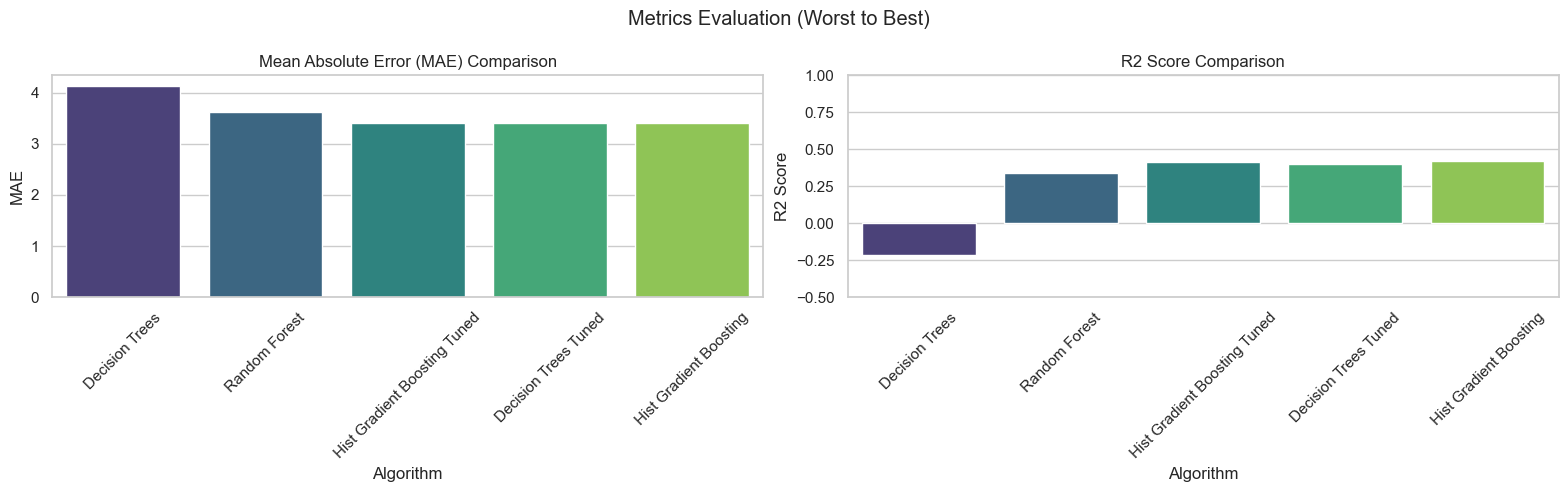

In [35]:
metrics = {
    "Algorithm": [
        "Decision Trees",
        "Decision Trees Tuned",
        "Random Forest",
        "Hist Gradient Boosting",
        "Hist Gradient Boosting Tuned",
    ],
    "MAE": [
        decision_tree_mae,
        decision_tree_tuned_mae,
        random_forest_mae,
        hist_gradient_boosting_mae,
        hist_gb_tuned_mae,
    ],
    
    "R2 Score": [
        decision_tree_r2,
        decision_tree_tuned_r2,
        random_forest_r2,
        hist_gradient_boosting_r2,
        hist_gb_tuned_r2,
    ],
}

# Converting to DataFrame for easier plotting
df_metrics = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(16, 5))
plt.suptitle('Metrics Evaluation (Worst to Best)')

# MAE Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x="Algorithm", y="MAE", data=df_metrics.sort_values(by = 'MAE', ascending=False), palette="viridis")
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xticks(rotation=45)
plt.ylabel("MAE")

# R2 Score Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="Algorithm", y="R2 Score", data=df_metrics.sort_values(by = 'MAE', ascending = False), palette = "viridis")
plt.title("R2 Score Comparison")
plt.xticks(rotation=45)
plt.ylim([-0.5, 1])
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()

### Interpretation of the results 🔍: 
In the evaluation of regression models for our project, we have conducted a comparative analysis illustrated in the accompanying bar charts, focusing on Mean Absolute Error (MAE) and R-squared (R²) metrics. The untuned Decision Tree algorithm initially displayed the highest MAE, indicating a relatively lower accuracy in its predictions. However, after parameter tuning, the Decision Tree's performance improved markedly, showcasing the impact of model optimization. In contrast, the Random Forest and Gradient Boosting algorithms naturally yielded lower MAEs, demonstrating their superior accuracy from the outset. The Gradient Boosting model, particularly after tuning, achieved the lowest MAE, signifying the highest precision among the models tested.

Similarly, the R² score comparison reveals that the untuned Decision Tree's performance was suboptimal, with a negative R² score suggesting that it performed worse than a simple model that would predict the mean value of the target variable. Post-tuning, its R² score improved substantially but did not surpass that of the ensemble methods. Both the Random Forest and the Gradient Boosting models demonstrated robust predictive power, as evidenced by their positive R² scores, with Gradient Boosting slightly edging out Random Forest. Notably, the tuned Gradient Boosting model attained the highest R² score, indicating its superior capability to explain the variance in the target variable.

In conclusion, the results from our analysis underscore the significance of hyperparameter tuning and the effectiveness of ensemble methods in regression tasks. The tuned Gradient Boosting model emerges as the clear leader, offering the most accurate and reliable predictions for our dataset. This insight will guide our subsequent modeling efforts as we seek to enhance predictive performance further.

# Reshaping the DataFrame to obtain Better Results

As we saw, there's something odd going on with this dataset: two of our features, namely `Physical Health` and `Mental Health` are extremely skewed. They make our dataset very **unbalanced** and none of the statistical methods we tried helped with it. The models we trained on the whole dataset perform poorly, even after tuning them. That's why we decided to change completely perspective: from now on we'll assume that the **zero values of our target variable contain for the most part filling values**. We might simply remove the extremes but this would be too risky and we'll probably lose valuable informations about the dataset, so we are going to scrub our dataset in the following way:

1. Relying on **domain knowledge** and on the informations acquired during the previous EDA on the entire dataset
2. Using **statistical methods**

The order is meaningful as this is a very delicate process.

In [36]:
# This is the dataframe we'll be working with from now on

df = medcenter_df.copy()
df.drop('Patient ID', axis = 1, inplace=True) # We immediately drop the unique identifier as it is of no use 

## Data Filtering (Domain Knowledge)

We are now removing some rows having a `Physical Health` score of 0, which means that the patient is perfectly healthy. We assume that a perfect score combined to any of those conditions is not feasible and we consider that entry a filler. Hence we remove it.

### Detailed Assumptions:
- No patient can feel poor or fair (as they are the lowest values of the `How do you Feel` column) and attain a perfect health score.
- No patient can have `Walking Difficulty` and a perfect health score since this was one of the most correlated features with our target variable in the entire dataset (see the previous heatmaps).
- No patient can have perfect health while not doing exercise, this also was a very correlated feature on the entire dataset.
- No patient can be obese or underweight and have perfect health.
- No patient can have an illness and have perfect health.

We also remove edge-cases:
- People sleeping more than 12 hours a day.
- People extremely obese and extremely underweight. Note that our patients `Age Group` starts from 18, generally speaking BMI healthy values range between 18.5 and 25, hence we selected extreme values and removed them.

In [37]:
# Conditions for filtering
condition = (
    (medcenter_df['Physical Health'] == 0) & (
        (medcenter_df['How do you Feel'] == 'Poor') |
        (medcenter_df['How do you Feel'] == 'Fair') |
        (medcenter_df['Walking Difficulty'] == 'Y') |
        (medcenter_df['Do you Exercise'] == 'N') |
        (medcenter_df['Hours of sleep'] > 14) |
        (medcenter_df['Hours of sleep'] < 4) |
        (medcenter_df['Body Mass Index'] > 30) |
        (medcenter_df['Body Mass Index'] <15 ) |
        (medcenter_df['Diabetes'] == 'Y') | 
        (medcenter_df['Torsades de Pointes'] == 'Y') |
        (medcenter_df['Mental Health'] > 5) |
        (medcenter_df['History of Stroke'] == 'Y')      
    )
)

# Applying the conditions to filter the dataframe
df = df[~condition]

print("Shape of the dataframe after filtering:", df.shape)

Shape of the dataframe after filtering: (156746, 18)


In [38]:
df.reset_index(inplace= True, drop= True) # We reset the index in order to avoid conflicts later with sklearn functions

## Multivariate Analysis

With 100.000 data removed, we are now going to implement a pairplot, to see if we can identify some pattern in our revamped dataset.

<Figure size 1200x600 with 0 Axes>

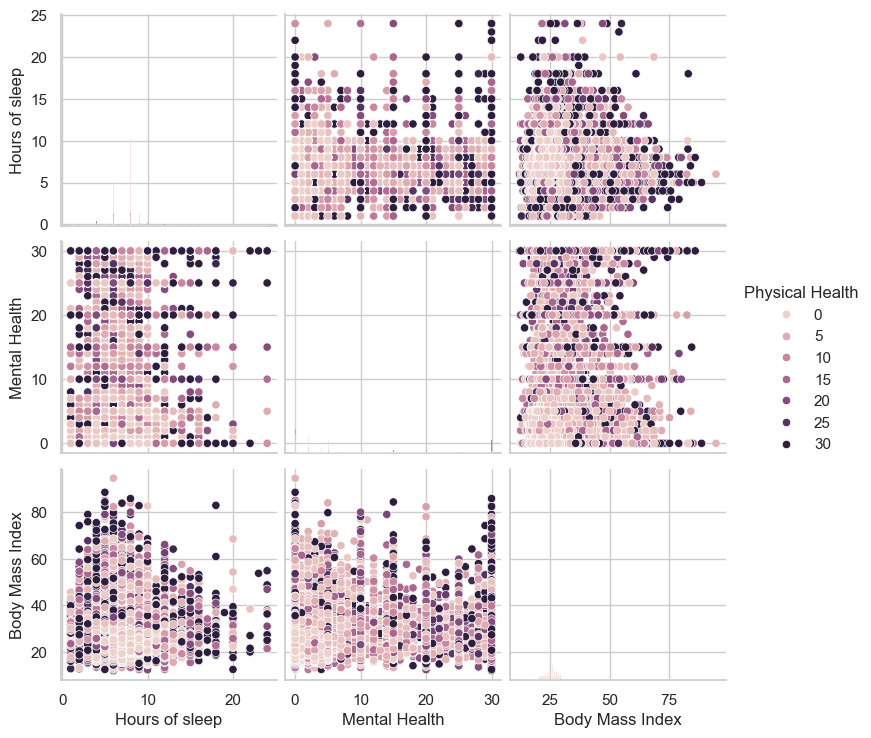

In [39]:
plt.figure(figsize=(12,6))
sns.pairplot(df, hue = 'Physical Health', diag_kind='hist')

### Intepretation of the pairplot 🔍
The dataset is still very big and at a first glance it appears confusing, but thanks to our `hue` set to the target variable, we can now notice some clusters of lighter points, corresponding to a `Physical Health` of value 0. Those clusters mostly appear in areas where the combination of features are in a healthy range: for example the combination `Mental Health` and `Body Mass Index` have a cluster of white-ish points where the bmi is ranging between 20-30 and the mental health tends to 0 (hence the patient is sane). 
Also the combination `Body Mass Index` and `Hours of Sleep` have a cluster of low physical health scores (remember that a low score means that the patient is healthy) where the bmi spans between 20-30 and the hours of sleep are between 5 and 10; both values should correspond to people that are in a healthy state.

The data points still **don't appear to be linearly separable**, but this trend of low scores of `Physical Health` is hopefully an indicator that we did a good job in reshaping our dataset.


## Univariate Analysis on our new Distributions

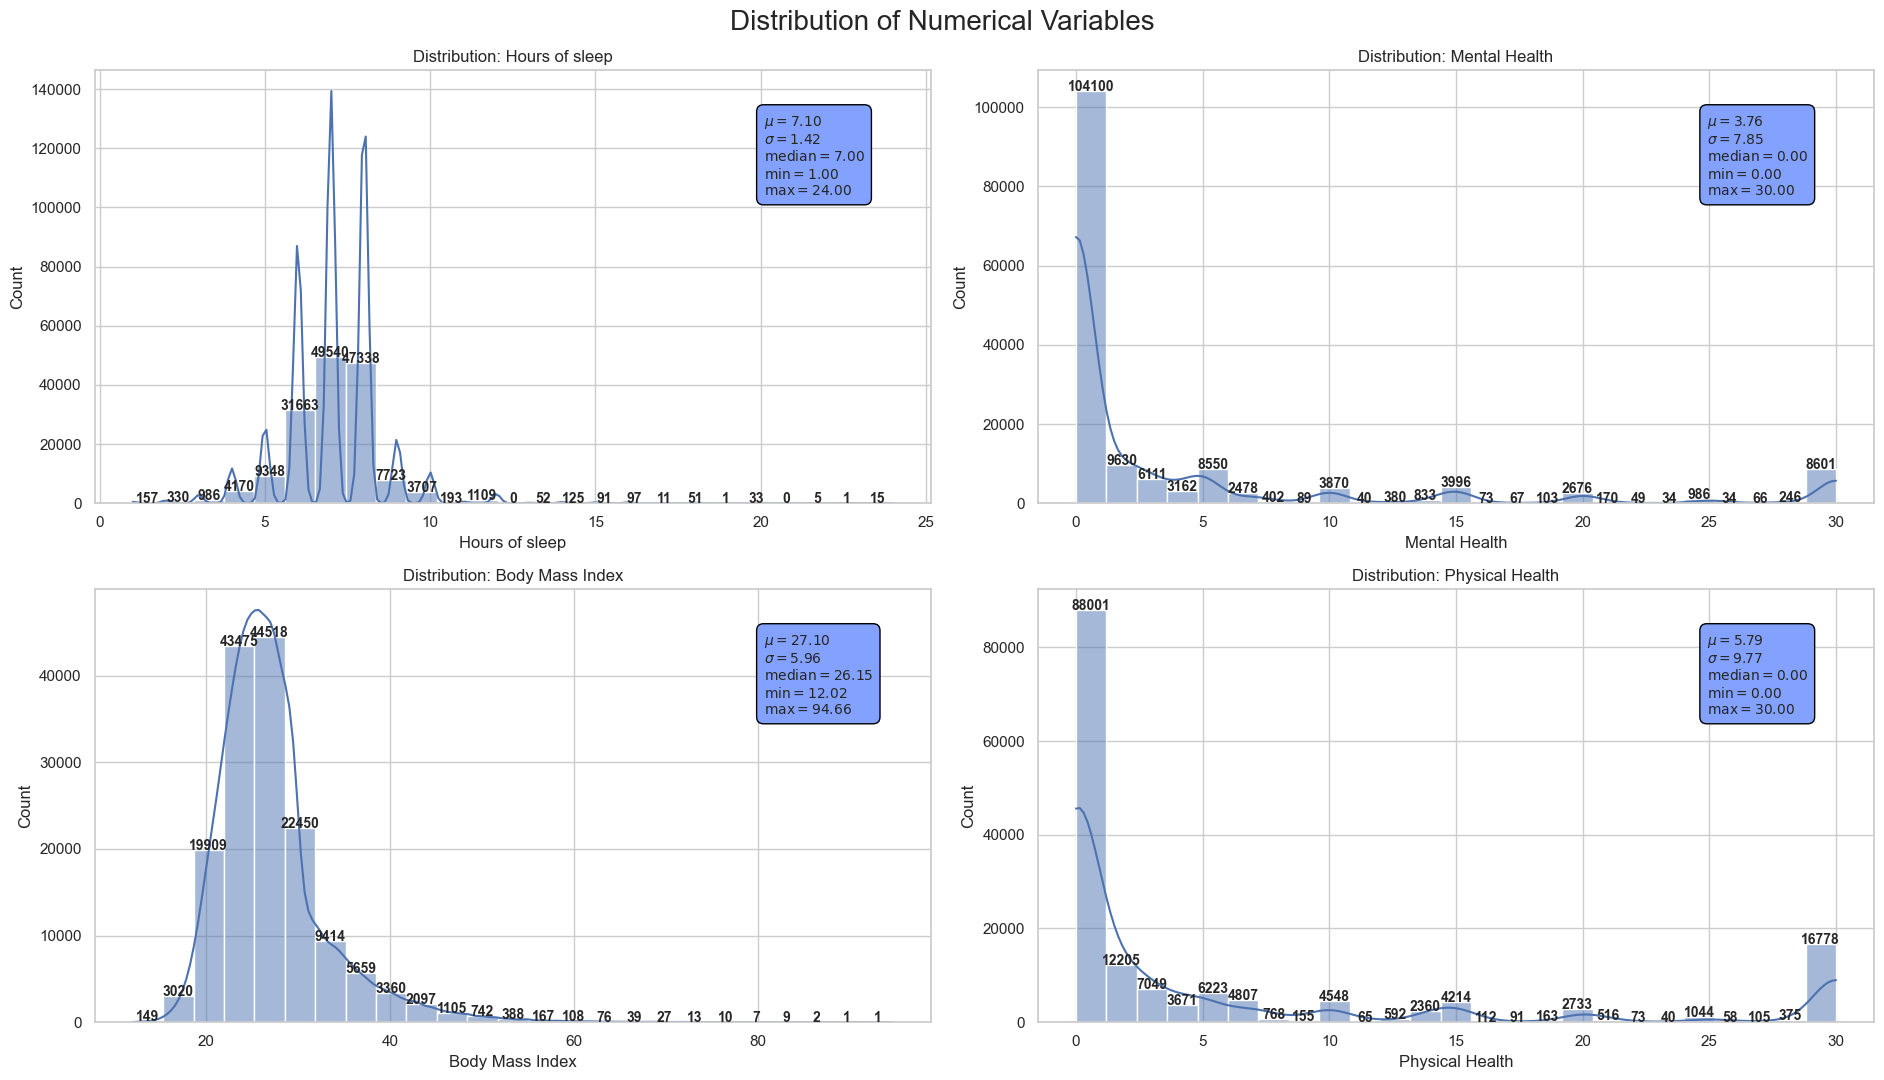

In [40]:
visualize_numerical_features(df)

### Interpretation of the Results 🔍:

1. **Distribution: Hours of Sleep**
   The histogram represents the distribution of reported hours of sleep, showing a multimodal pattern with the primary mode around the 7 to 8-hour mark, aligning with standard sleep recommendations. Secondary peaks are present, indicating variability in sleep patterns, while extreme values suggest the presence of outliers.

2. **Distribution: Mental Health**
   A pronounced left skew characterizes the mental health score distribution, indicating a concentration of lower scores. This skew persists even after accounting for the relationship between physical and mental health, where both are generally better at lower scores. The data indicates that most participants are clustered at the healthier end of the mental health spectrum, with a rapid decrease in frequency as scores increase.

3. **Distribution: Body Mass Index (BMI)**
   BMI values follow an approximately normal distribution with a mean that suggests a population average in the overweight category. The right tail indicates a subset of the population with a higher BMI.

4. **Distribution: Physical Health**
   After removing numerous entries with a physical health score of zero, assumed to be filling values, the distribution remains highly skewed to the left. The prevalence of lower scores (where lower scores denote better health) remains high, indicating that the majority of the remaining data points reflect better physical health outcomes, with a steep drop-off as scores increase.

In summary, despite the removal of potential filler entries the histograms for both mental and physical health exhibit, still, significant leftward skewness. 

### Applying the LogTransformer on Numerical Data

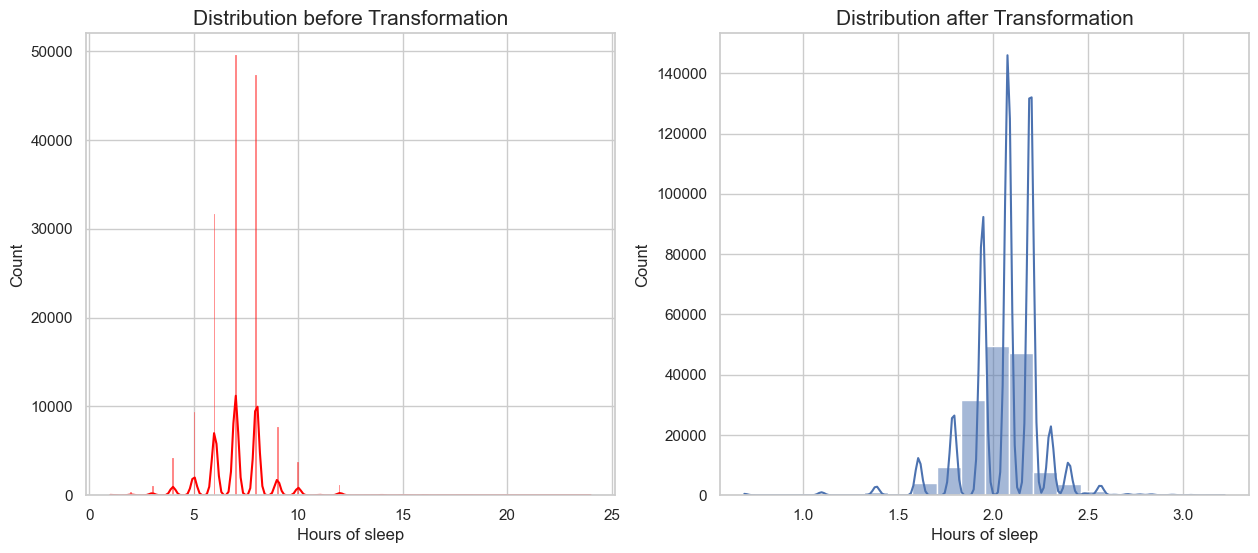

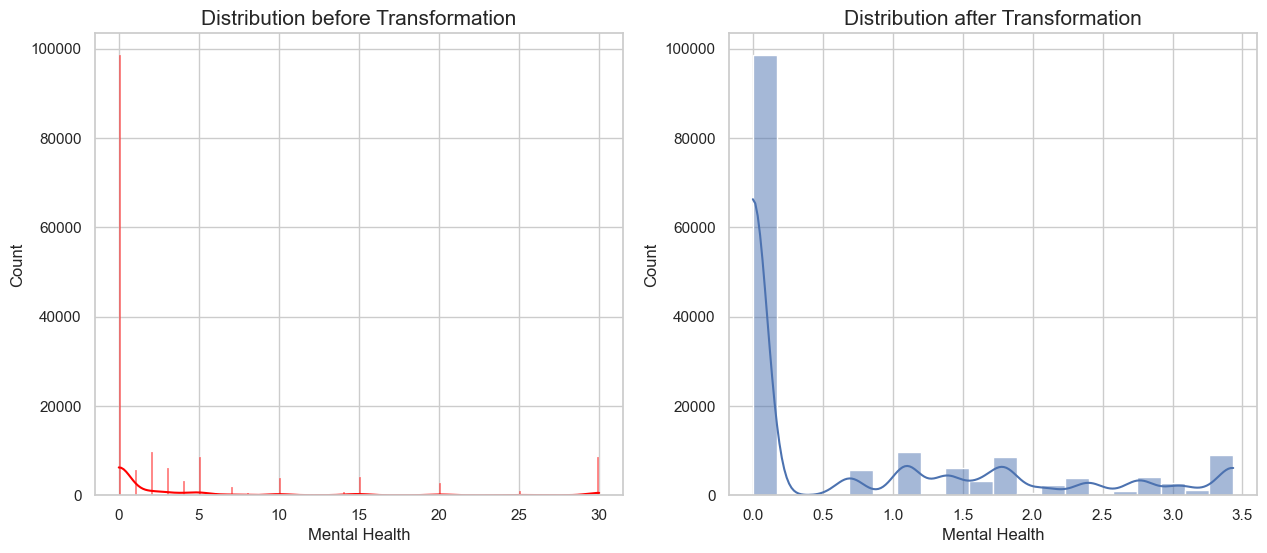

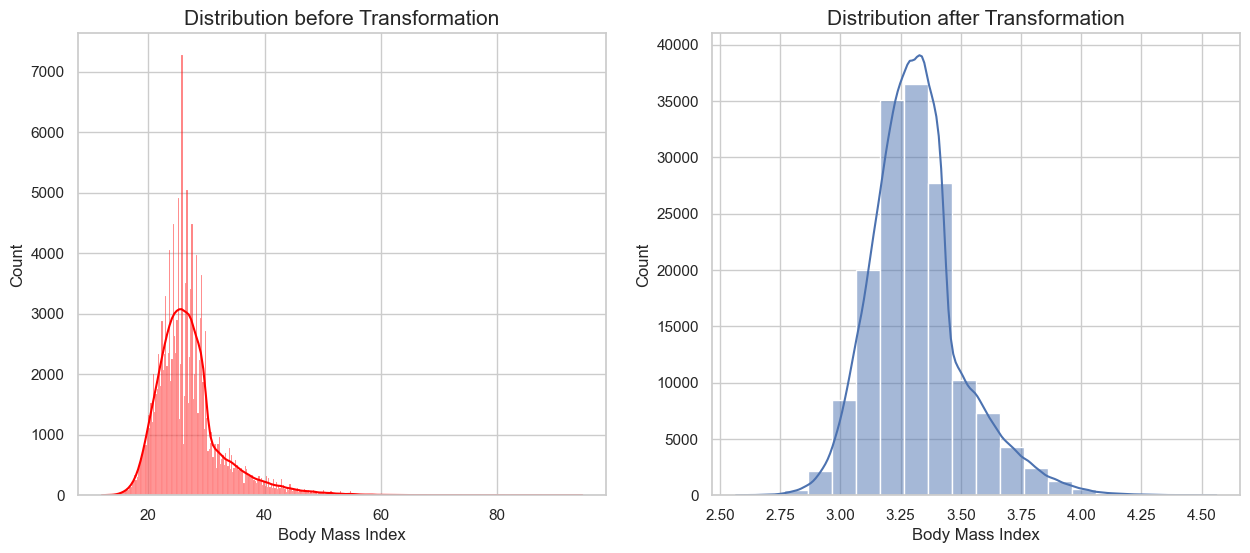

In [41]:
for feature in numerical_features[:3]:
    df = logTransform(df, feature)

The visual comparison of histograms before and after log transformation in this dataset reveals varying levels of effectiveness. For mental health, the log transformation has a minimal impact on the highly skewed distribution while, in contrast, the transformation significantly improves the distributions for hours of sleep and BMI, resulting in more symmetric, bell-shaped curves that are better suited for standard statistical analysis. 

### Encoding Categorical Variables 🔂
Moving forward, we are now going to apply the encoding process to the data, adhering to the same assumptions established during the initial preprocessing phase of the entire dataset.

In [42]:
# Columns to be one-hot encoded
onehot_encoded_columns = ['Gender', 'Ethnicity', 'Walking Difficulty', 'Skin Cancer', 'Torsades de Pointes', 'Asthma Status', 'Do you Exercise', 'Kidney Disease','Is Smoking','History of Stroke', 'How many Drinks per Week']
# Columns to be label encoded
label_encoded_columns = ["How do you Feel", "Age Group", "Diabetes"]

# Applying OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # 'drop' parameter is used to avoid multicollinearity
for column in onehot_encoded_columns:
    # The encoder returns a 2D array, which we need to convert to a DataFrame
    onehot_df = pd.DataFrame(encoder.fit_transform(df[[column]]))
    
    # The new columns will be named after the classes detected by the encoder
    onehot_df.columns = encoder.get_feature_names_out([column])
    
    # Drop the original column from the main DataFrame
    df.drop([column], axis=1, inplace=True)
    
    # Concatenate the one-hot encoded DataFrame to the main one
    df = pd.concat([df, onehot_df], axis=1)

# Applying LabelEncoder
le = LabelEncoder()
for column in label_encoded_columns:
    df[column] = le.fit_transform(df[column])

df.head()


,Hours of sleep,How do you Feel,Diabetes,Age Group,Mental Health,Body Mass Index,Physical Health,Gender_M,Ethnicity_Asian,Ethnicity_Black,...,Ethnicity_White,Walking Difficulty_Y,Skin Cancer_Y,Torsades de Pointes_Y,Asthma Status_Y,Do you Exercise_Y,Kidney Disease_Y,Is Smoking_Y,History of Stroke_Y,How many Drinks per Week_Y
0,2.397895,2,0,12,0.000000,2.806386,7.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2.079442,1,2,9,0.000000,3.679334,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.079442,2,0,8,0.000000,3.118834,3.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.302585,1,0,12,0.000000,3.193763,15.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2.079442,2,2,10,2.397895,3.500137,15.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


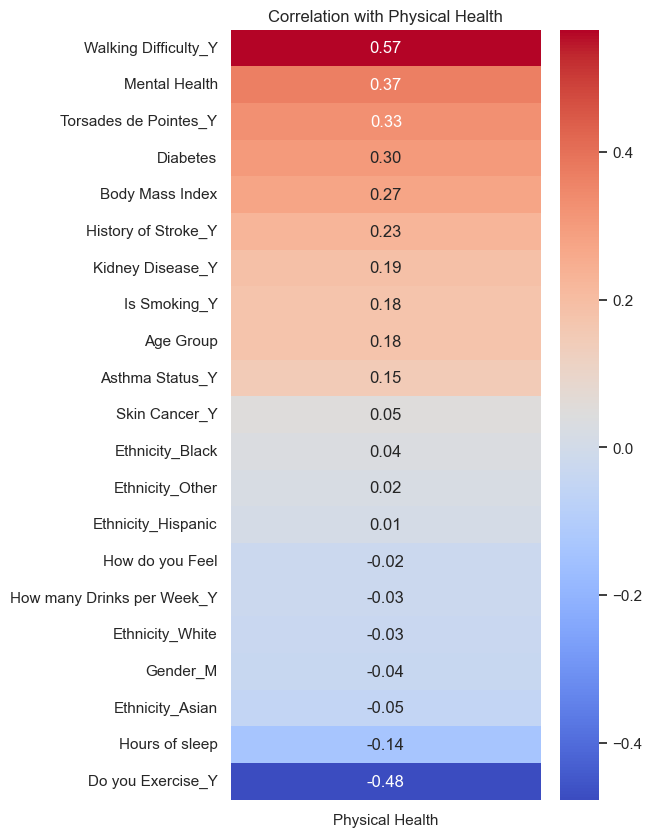

In [43]:
# heatmap with only the target variable
corr_medcenter_df = df.corr()

# Define the target variable
target_variable = 'Physical Health'

# Compute the correlation with the target variable
target_corr = corr_medcenter_df[target_variable].drop(target_variable)

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Plot a heatmap of the correlations with the target variable
plt.figure(figsize=(5, 10))
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=True)
plt.title(f'Correlation with {target_variable}')
plt.show()

### Interpretation of the Results 🔍:

The correlation heatmap reveals that after the meticulous preprocessing of the dataset, where potential filling values were removed, the strength of the correlations between various factors and physical health has increased. This is evident in the robust positive correlation of 0.57 between walking difficulty and physical health, indicating a strong association where challenges in walking are likely to coincide with poorer physical health metrics. Mental health issues and the presence of Torsades de Pointes, both with substantial positive correlations of 0.37 and 0.33 respectively, also suggest that as these conditions worsen, physical health tends to deteriorate. This enhancement in correlation magnitudes post-cleaning underscores the importance of rigorous data preprocessing to unveil more pronounced and potentially more accurate relationships within health-related data.

With the correlations between various factors and our target variable of physical health now clearly established, we can streamline our dataset for further analysis by omitting variables that demonstrate insignificant correlation coefficients. This refinement will focus our model on the most influential predictors, enhancing both the efficiency and interpretability of subsequent analyses. Variables with negligible correlations—those close to zero—can be considered for removal, as their impact on physical health is minimal, allowing for a more targeted and potentially more accurate exploration of the factors that truly matter in predicting physical health outcomes. This step is a prudent measure in predictive modeling, ensuring that the model is not burdened by superfluous data that do not contribute to its predictive power.

In [44]:
column_to_drop = ['Ethnicity_Black','Ethnicity_Asian','Gender_M','Ethnicity_Hispanic',  'Ethnicity_Other', 'Ethnicity_White', 'Skin Cancer_Y','How many Drinks per Week_Y']
df.drop(column_to_drop, axis = 1, inplace=True)  

### New Heatmap with Relevant Features

<Axes: >

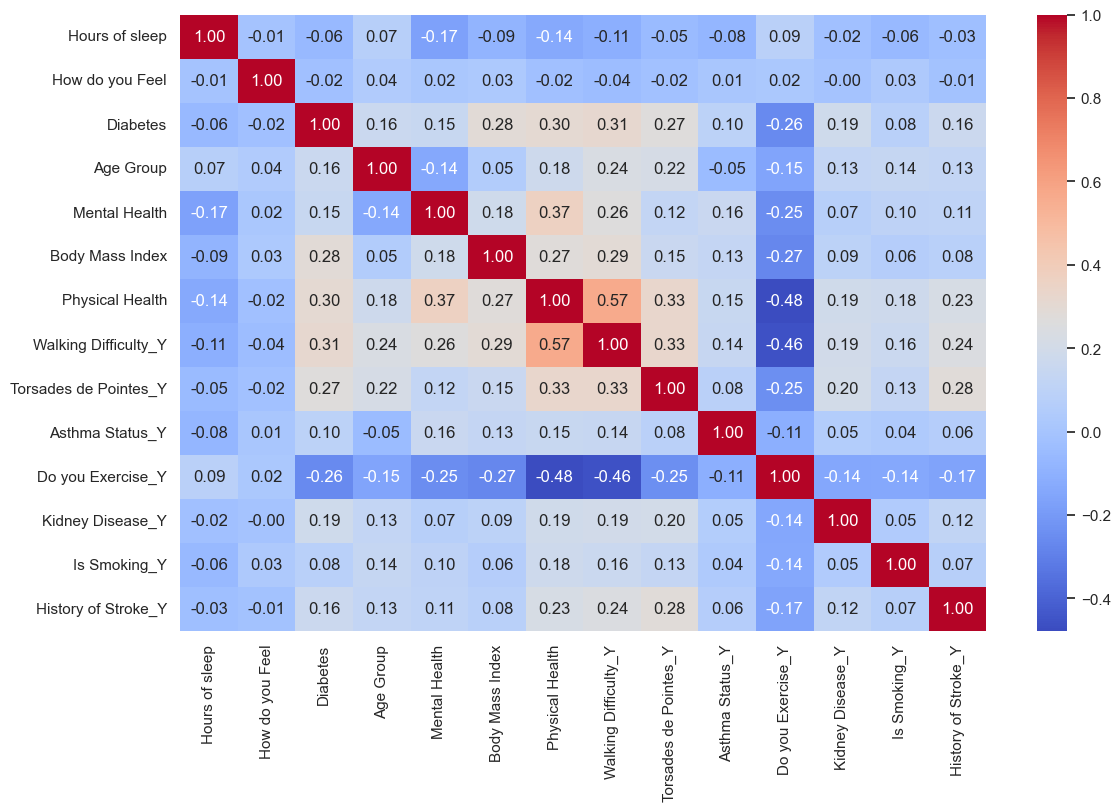

In [45]:
# heatmap complete
plt.figure(figsize=(13, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f', cbar=True)

### Interpretation of the Results 🔍:

- **Physical Health and Walking Difficulty**: There's a strong positive correlation (0.57) suggesting that individuals who have difficulties walking are more likely to report worse physical health.

- **Physical Health and Mental Health**: A moderate positive correlation (0.37) indicates that poorer mental health scores are associated with poorer physical health.

- **Exercise and Physical Health**: There is a moderate negative correlation (-0.48), which could indicate that individuals who exercise regularly tend to have better physical health scores.

- **Exercise and Walking Difficulty**: The negative correlation (-0.46) may suggest that those who exercise regularly report fewer walking difficulties.

- **Mental Health and Hours of Sleep**: A negative correlation (-0.17) could indicate that fewer hours of sleep are associated with poorer mental health. 

- **Physical Health and Diabetes**: There is a positive correlation (0.30), indicating that the presence of diabetes is associated with lower physical health scores.



### Partitioning the Dataset into Train and Test Set 🔧 


In [46]:
from sklearn.model_selection import train_test_split


X = df.drop('Physical Health', axis=1)
y = df['Physical Health']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scaling 📚

In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Only transform the test data using the already fitted scaler
X_test = scaler.transform(X_test)

# Now X_train has scaled columns and X_test has columns scaled using the training data statistics

Having meticulously prepared our dataset, we proceeded by partitioning it into training and test sets, mirroring the approach taken with the complete dataset. Subsequently, we scaled our variables to ensure uniformity in magnitude, which is crucial for the performance of many machine learning algorithms. With the data now suitably preprocessed and partitioned, we are poised to apply various modeling techniques. Our expectation is that the elimination of potential filler values will translate into a marked improvement in the models' predictive capabilities, corroborating our initial premise that the majority of physical health values recorded as zero were likely filling values. This next phase will be critical in evaluating the true impact of our data cleaning and preparation efforts.


## Reflecting on progress... What have we discovered so far? ✍️
Upon analyzing our dataset, we identified that a significant number of entries with a physical health score of 0 are probably filling values, not representative of actual health conditions. To enhance the accuracy of our predictions, we removed these instances where the physical health score was 0, but other indicators suggested suboptimal health. For our predictive modeling, we selected a suite of models, each offering unique strengths. Linear regression was chosen for its simplicity and interpretability, providing a solid baseline for comparison. Decision Trees were employed for their ability to model non-linear relationships and their intuitiveness in decision-making processes. Random Forest, an ensemble of Decision Trees, was selected for its ability to reduce overfitting and improve accuracy. Hist Gradient Boosting, a variant of gradient boosting, was chosen for its efficiency with large datasets and capability to handle missing values, providing robustness to the model. Each of these models was further tuned to optimize their performance, ensuring a comprehensive and effective approach to predicting physical health outcomes in our dataset.

Now, let's delve into our findings and discern which of these selected models stands out as the most effective in predicting physical health outcomes!

## Linear regression

In [48]:
from sklearn.linear_model import LinearRegression

start_time = time.time()

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print_score(lin_reg, X_train, y_train, X_test, y_test, train=True)
print_score(lin_reg, X_train, y_train, X_test, y_test, train=False)

linear_regression_mae = mean_absolute_error(y_test, lin_reg.predict(X_test))
linear_regression_r2 = r2_score(y_test, lin_reg.predict(X_test))

end_time = time.time()

linear_reg_time = end_time - start_time

Train Result:
Mean Squared Error: 52.775
Mean Absolute Error: 4.669
R-squared: 0.448
Test Result:
Mean Squared Error: 52.048
Mean Absolute Error: 4.627
R-squared: 0.448


We know that our data is not linearly separable but we are still going to train a linear regression as a baseline model. It serves as a simple method to establish a benchmark against which more complex models can be compared.

The linear regression model has moderate predictive accuracy, with an average prediction error (MAE) of roughly 5 points. This means that, typically, the model's predictions are within 5 points of the actual health scores. The model's R-squared value is about 0.45, which tells us it can explain only 45% of the variation in the health data. This implies there's still a lot about the patient's health that the model isn't capturing! 

The linear regression model does not appear to overfit since the performance on both the training and test datasets is similar, suggesting it generalizes well to unseen data. However, linear regression might not be optimal for our dataset, which has many categorical variables. These can imply complex, non-linear relationships that linear regression is not designed to capture, potentially limiting its effectiveness in accurately predicting physical health.

Given the limitations observed with linear regression, let's proceed to evaluate the next model in our lineup to see if we can achieve a better fit for our dataset's characteristics.

## Decision Trees

In [49]:
from sklearn.tree import DecisionTreeRegressor

start_time = time.time()

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

print_score(tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score(tree_reg, X_train, y_train, X_test, y_test, train=False)

end_time = time.time()

decision_tree_mae_filtered = mean_absolute_error(y_test, tree_reg.predict(X_test))
decision_tree_r2_filtered = r2_score(y_test, tree_reg.predict(X_test))

dectree_untuned_time = end_time - start_time

Train Result:
Mean Squared Error: 1.433
Mean Absolute Error: 0.192
R-squared: 0.985
Test Result:
Mean Squared Error: 82.465
Mean Absolute Error: 4.701
R-squared: 0.125


The decision trees model presents a  contrast in performance between the training and testing datasets. On the training set, it achieves an R-squared value close to 1 (0.985) and a very low Mean Absolute Error (MAE) of approximately 0.2. This suggests that the model can almost perfectly predict the physical health scores within the training data, suggesting a clear case of overfitting.

However, when applied to the test data, the model's performance drops significantly, with an R-squared value of roughly 0.13 and an MAE of about 4.7. Such a discrepancy between training and test performance indicates overfitting, where the model learns the training data too well, including its noise and anomalies, thus failing to generalize to new, unseen data.

Anyway, when these outcomes are juxtaposed with the results obtained from the entire dataset, there is a noticeable improvement. Specifically, the test R-squared value has shifted from negative, which indicates a model performing worse than a simple mean predictor, to a positive value. Despite being low, this positive value suggests the model now captures some of the variability in the test data, unlike before. This improvement reaffirms the value of the data cleaning process, particularly the removal of potential filler values that likely distorted the previous model's predictive power.

Given these observations, it's clear that while decision trees have the potential to capture complex patterns in the data, they may require careful tuning to prevent overfitting and ensure that they can generalize well to new data.

### Hyperparameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=tree_reg, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=1
    )

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

decision_tree_tuned_mae_filtered = mean_absolute_error(y_test, grid_search.predict(X_test))
decision_tree_tuned_r2_filtered = r2_score(y_test, grid_search.predict(X_test))

# use the best parameter to train the model and print the performance
best_tree_reg = grid_search.best_estimator_
print_score(best_tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score(best_tree_reg, X_train, y_train, X_test, y_test, train=False)

end_time = time.time()

dectree_tuned_time = end_time - start_time

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.5489803947759683
Train Result:
Mean Squared Error: 38.578
Mean Absolute Error: 3.688
R-squared: 0.597
Test Result:
Mean Squared Error: 41.946
Mean Absolute Error: 3.822
R-squared: 0.555


After tuning our decision tree model, we've seen a noticeable improvement in its ability to predict physical health scores. The R-squared values for both training and test sets are now above 0.5, which means the model explains more than half of the variance in the data. The Mean Absolute Error has also decreased, around 4 for both datasets, indicating a tighter prediction range compared to the untuned model.

These enhancements affirm that our efforts in fine-tuning the model parameters were worthwhile and that our model is becoming more adept at generalizing its predictions to unseen data. The results also reinforce the decision to discard the non-representative zero values from our dataset, as we continue to see better model performance without them.

Encouraged by the improved performance post-tuning, we will next examine the feature importance plot generated by the decision tree model. This will offer valuable insights into which variables most significantly impact physical health scores in decision trees!

In [51]:
import plotly.offline as py
import plotly.graph_objs as go


# Scatter plot 
trace = go.Scatter(
    y = best_tree_reg.feature_importances_,
    x = X.columns,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = best_tree_reg.feature_importances_,
        colorscale = 'Portland',
        showscale = True
    ),
    text = X.columns
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Decision Trees Feature Importance',
    hovermode = 'closest',
    xaxis = dict(
        ticklen = 5,
        showgrid = False,
        zeroline = False,
        showline = False
    ),
    yaxis = dict(
        title = 'Feature Importance',
        showgrid = False,
        zeroline = False,
        ticklen = 5,
        gridwidth = 2
    ),
    showlegend = False
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter_rfclf_01')

From the plot, we can observe that one feature stands out with a notably higher importance score, marked by a red dot indicating Walking Difficulty. This suggests that, according to the Decision Tree model, this particular feature plays a significant role in predicting the target variable! The rest of the features have varying degrees of importance, with most appearing to have a modest impact on the model's predictions.
Encouraged by these advances, we are now ready to proceed with analyzing the random forest model to see if it can offer even better predictive accuracy and generalization than our tuned decision tree model!

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

start_time = time.time()

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

print_score(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score(rf_reg, X_train, y_train, X_test, y_test, train=False)

random_forest_mae_filtered = mean_absolute_error(y_test, rf_reg.predict(X_test))
random_forest_r2_filtered = r2_score(y_test, rf_reg.predict(X_test))

end_time = time.time()

rf_untuned_time = end_time - start_time

Train Result:
Mean Squared Error: 7.497
Mean Absolute Error: 1.586
R-squared: 0.922
Test Result:
Mean Squared Error: 46.001
Mean Absolute Error: 4.018
R-squared: 0.512


The random forest model's results show a clear case of overfitting, as indicated by its high performance on the training data but significantly lower accuracy on the test data. The R-squared value for the test set suggests the model has a moderate predictive ability, an improvement from the complete dataset, yet there is a substantial difference from the training results. 

This overfitting highlights the need for model tuning to ensure the predictions are not just tailored to the training data but can generalize across new, unseen data. We will proceed with the tuning of the random forest to enhance its performance on the test dataset.

### Hyperparameter tuning

In [53]:
from sklearn.model_selection import RandomizedSearchCV

start_time = time.time()

param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    rf_reg, 
    param_distributions=param_grid, 
    n_iter=50, 
    cv=5, 
    scoring='r2',
    verbose=1
    )

random_search.fit(X_train, y_train)
best_params = random_search.best_params_

print_score(random_search, X_train, y_train, X_test, y_test, train=True)
print_score(random_search, X_train, y_train, X_test, y_test, train=False)

end_time = time.time()

rf_tuned_time = end_time - start_time

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Train Result:
Mean Squared Error: 40.983
Mean Absolute Error: 4.021
R-squared: 0.572
Test Result:
Mean Squared Error: 42.652
Mean Absolute Error: 4.091
R-squared: 0.548


In [54]:
rf_tuned_time

351.1502859592438

In [55]:
random_forest_tuned_mae_filtered = mean_absolute_error(y_test, random_search.predict(X_test))
random_forest_tuned_r2_filtered = r2_score(y_test, random_search.predict(X_test))

After the tuning phase for the random forest model, we observe a more consistent performance between the training and test results. The R-squared values for both are now around 0.5, indicating a more balanced model that better generalizes to unseen data. The Mean Absolute Error remains around 4 for both sets, suggesting the predictions are on average within 4 points of the actual health scores.

This alignment between training and test performance is a positive sign that our tuning has effectively reduced overfitting. With these adjustments, the model has not only improved its predictive accuracy but also its reliability across different subsets of data, as compared to the pre-tuned state.

Next, we will examine the feature importance plot to understand which variables are most influential in our model's predictions. Following this, we'll evaluate the performance of the Hist Gradient Boosting model to see if it can further refine our predictions!

In [56]:
import plotly.offline as py
import plotly.graph_objs as go

# Scatter plot 
trace = go.Scatter(
    y = rf_reg.feature_importances_,
    x = X.columns,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf_reg.feature_importances_,
        colorscale = 'Portland',
        showscale = True
    ),
    text = X.columns
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Random Forests Feature Importance',
    hovermode = 'closest',
    xaxis = dict(
        ticklen = 5,
        showgrid = False,
        zeroline = False,
        showline = False
    ),
    yaxis = dict(
        title = 'Feature Importance',
        showgrid = False,
        zeroline = False,
        ticklen = 5,
        gridwidth = 2
    ),
    showlegend = False
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter_rfclf_01')

 In this Random Forest model, we can see that Walking Difficulty is particularly significant compared to the others, with a higher feature importance score. This suggests it has a strong influence on the model's predictions. Another feature, BMI, also seems to be fairly important, though to a lesser degree.

The remaining features have lower importance scores, as indicated by their position closer to the origin of the plot. These features contribute less to the model's decision-making process.

## Hist Gradient Boosting

In [57]:
from sklearn.ensemble import HistGradientBoostingRegressor

start_time = time.time()

hist_gb_model = HistGradientBoostingRegressor()
hist_gb_model.fit(X_train, y_train)

print_score(hist_gb_model, X_train, y_train, X_test, y_test, train=True)
print_score(hist_gb_model, X_train, y_train, X_test, y_test, train=False)

hist_gradient_boosting_mae_filtered = mean_absolute_error(y_test, hist_gb_model.predict(X_test))
hist_gradient_boosting_r2_filtered = r2_score(y_test, hist_gb_model.predict(X_test))

end_time = time.time()

hist_gb_untuned_time = end_time - start_time

Train Result:
Mean Squared Error: 39.461
Mean Absolute Error: 3.780
R-squared: 0.588
Test Result:
Mean Squared Error: 39.953
Mean Absolute Error: 3.797
R-squared: 0.576


The Hist Gradient Boosting model shows that both the training and test R-squared values are around 0.5, suggesting a moderate prediction ability. The Mean Absolute Error for both datasets is approximately 4, indicating that our model's predictions are relatively close to the actual values, with an average deviation of 4 units.

This level of performance indicates that the model is able to capture a significant portion of the underlying patterns in the data without overfitting, as evidenced by the similar metrics in training and testing. 

Given these results, we'll proceed with tuning the Hist Gradient Boosting model to further improve its accuracy and ensure that it performs even better on unseen data.

### Hyperparameter tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV

start_time = time.time()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [15, 30, 45],
}

# Use RandomizedSearchCV for hyperparameter tuning
hist_gb_tuned = RandomizedSearchCV(
    estimator=hist_gb_model,
    param_distributions=param_grid,
    n_iter= 100,  # Adjusting the number of iterations
    scoring='r2', 
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Using all available CPU cores
    verbose = 1
)

hist_gb_tuned.fit(X_train, y_train)
print_score(hist_gb_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(hist_gb_tuned, X_train, y_train, X_test, y_test, train=False)

hist_gb_tuned_mae_filtered = mean_absolute_error(y_test, hist_gb_tuned.predict(X_test))
hist_gb_tuned_r2_filtered = r2_score(y_test, hist_gb_tuned.predict(X_test))

end_time = time.time()

hist_gb_tuned_time = end_time - start_time

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Train Result:
Mean Squared Error: 39.605
Mean Absolute Error: 3.798
R-squared: 0.586
Test Result:
Mean Squared Error: 39.954
Mean Absolute Error: 3.807
R-squared: 0.576


The tuning phase for the Hist Gradient Boosting model has resulted in a closely aligned performance on both the training and test sets, with R-squared values hovering around 0.58. The Mean Absolute Error is just under 4 for both sets, indicating a stable and consistent predictive performance.
These outcomes suggest the model tuning was successful in enhancing the model's generalization abilities, affirming the predictive quality and the reliability of the model on unseen data!

In summary, these results point to a well-tuned model that has generalizable predictive power, with an R-squared above 0.5 suggesting that more than half of the variance in the target variable is being captured by the model on both the training and the test sets.
With the tuning complete and the model's performance optimized, we can conclude that our predictive analytics framework is becoming increasingly refined and capable.


###  Comparative analysis of time complexity across the models 🕜

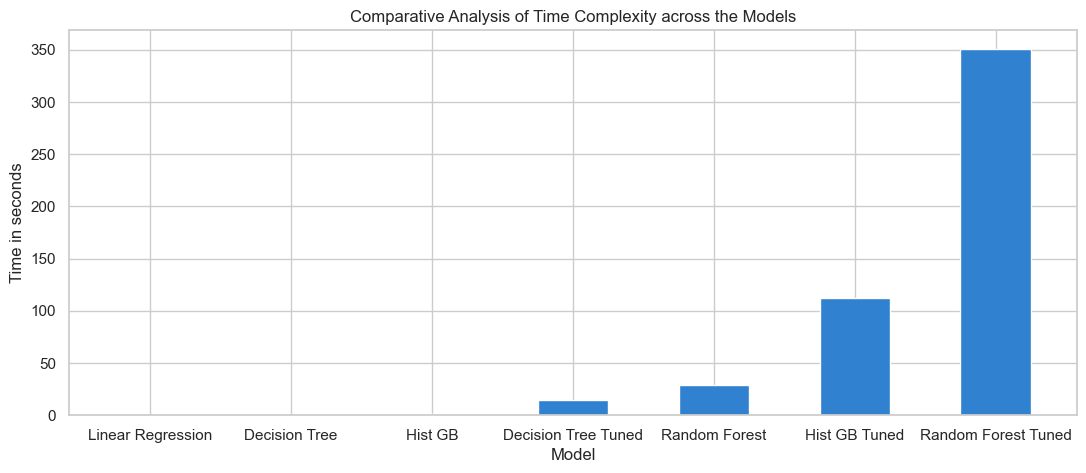

In [59]:
models = {
    'Linear Regression': linear_reg_time,
    'Decision Tree': dectree_untuned_time,
    'Decision Tree Tuned': dectree_tuned_time,
    'Random Forest': rf_untuned_time,
    'Random Forest Tuned': rf_tuned_time,
    'Hist GB': hist_gb_untuned_time,
    'Hist GB Tuned': hist_gb_tuned_time
}

model_names = list(models.keys())
execution_times = list(models.values())

sorted_models = sorted(zip(model_names, execution_times), key=lambda x: x[1])

sorted_model_names, sorted_execution_times = zip(*sorted_models)

# Plot the training times
plt.figure(figsize=(13,5))
plt.bar(sorted_model_names, sorted_execution_times, color='#3081D0', width=0.5)
plt.xlabel('Model')
plt.ylabel('Time in seconds')
plt.title('Comparative Analysis of Time Complexity across the Models')
plt.show()


This bar chart illustrates the time complexities associated with each of the machine learning models utilized in our project. Linear regression emerges as the most time-efficient model, indicative of its computational simplicity. Also decision trees, including their tuned versions, maintain relative a good time-efficiency. 

The Random Forest model, particularly in its tuned form, exhibits the highest time complexity, which is a characteristic trait of ensemble methods due to their process of aggregating the outputs of multiple trees. Hist Gradient Boosting models, both before and after tuning, have greater time complexities than individual decision trees but are markedly more efficient than the Random Forest, illustrating the effectiveness of their optimization.

In summary, this chart provides a clear illustration of the trade-off between computational efficiency and model complexity, with more complex models typically requiring more time to train.

### Comparative Performance Analysis of Regression Models on MAE and $R^2$ Metrics 🔬

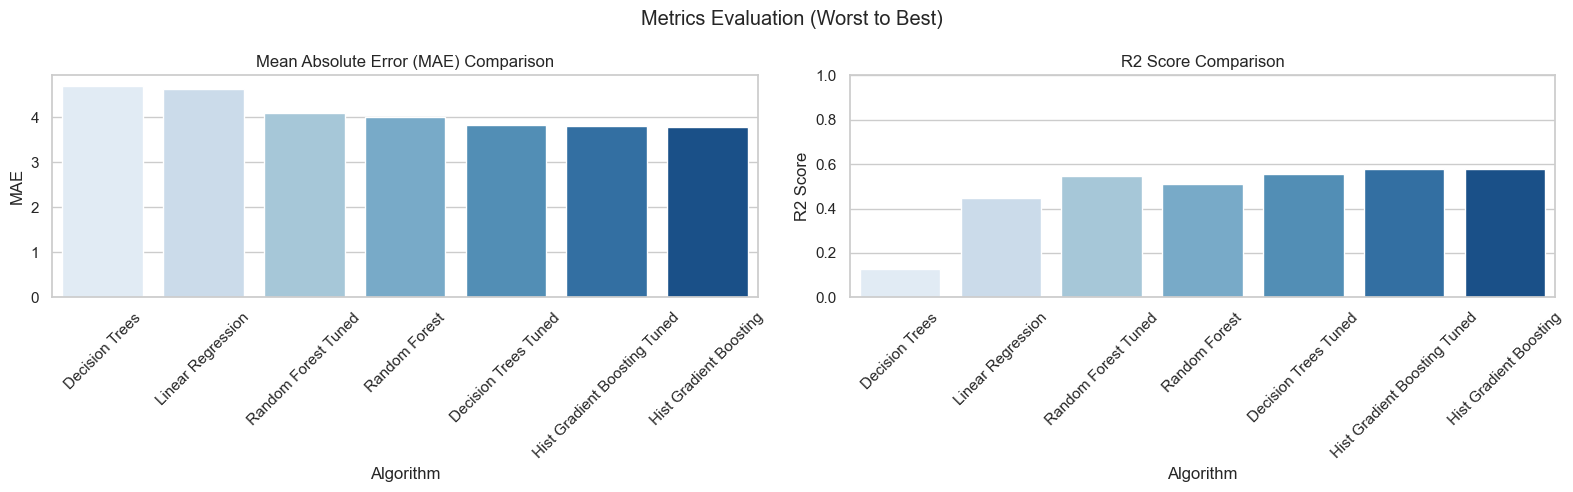

In [64]:
metrics = {
    "Algorithm": [
        "Linear Regression",
        "Decision Trees",
        "Decision Trees Tuned",
        "Random Forest",
        "Random Forest Tuned",
        "Hist Gradient Boosting",
        "Hist Gradient Boosting Tuned",
    ],
    "MAE": [
        linear_regression_mae,
        decision_tree_mae_filtered,
        decision_tree_tuned_mae_filtered,
        random_forest_mae_filtered,
        random_forest_tuned_mae_filtered,
        hist_gradient_boosting_mae_filtered,
        hist_gb_tuned_mae_filtered,
    ],
    
    "R2 Score": [
        linear_regression_r2,
        decision_tree_r2_filtered,
        decision_tree_tuned_r2_filtered,
        random_forest_r2_filtered,
        random_forest_tuned_r2_filtered,
        hist_gradient_boosting_r2_filtered,
        hist_gb_tuned_r2_filtered,
    ],
}

# Converting to DataFrame for easier plotting
df_metrics = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(16, 5))
plt.suptitle('Metrics Evaluation (Worst to Best)')

# MAE Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x="Algorithm", y="MAE", data=df_metrics.sort_values(by = 'MAE', ascending=False), palette="Blues")
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xticks(rotation=45)
plt.ylabel("MAE")

# R2 Score Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="Algorithm", y="R2 Score", data=df_metrics.sort_values(by = 'MAE', ascending = False), palette = "Blues")
plt.title("R2 Score Comparison")
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()

### Final Conclusions 🖊️

In the MAE comparison chart, the bars suggest that the 'Hist Gradient Boosting' algorithm has the lowest MAE and hence is the best-performing model in terms of prediction accuracy, followed closely by the 'Hist Gradient Boosting Tuned'. 'Decision Trees' appear to have the highest MAE, indicating a less accurate model.

From the R2 score comparison chart, 'Hist Gradient Boosting' again performs the best, indicating a strong predictive power, while 'Decision Trees' has a negative R2 score, showing poor performance and suggesting that it is not suitable for the dataset. 

In summary, the 'Hist Gradient Boosting' models, especially the tuned version, outperform the other algorithms, with the 'Decision Trees' being the least effective according to these metrics!

Upon careful review of the updated performance metrics for our suite of predictive models, we observe a definitive improvement across the board. This enhancement substantiates our preliminary theory that a substantial portion of the entries with physical health values set to zero were indeed filling values. By removing certain entries from our dataset, we've seen a clear improvement in our models' accuracy, shown by the lower average error (MAE) and higher R-squared values, which measure how well our predictions match the actual data. The 'Hist Gradient Boosting Tuned' model shows the biggest improvement in its R-squared value, proving that our careful cleaning of the data was worthwhile. This result confirms the importance of good data cleaning and boosts our confidence in the improved models' ability to predict accurately.


In wrapping up our work with the MedCenter dataset, it's like we've been doctors using data to understand people's health. Just like doctors use symptoms to figure out what's wrong with someone, we used data to predict how healthy people might be!

Our project showed how important data analysis is in healthcare. We used machine learning to find patterns in the data, which helped us understand how different things affect people's health. It's like using a stethoscope to listen to someone's heart, but we were listening to the data.

In conclusion,  this project was more than an academic endeavor; it was a step into the future, demonstrating the incredible potential of technology in healthcare. Our findings lay the groundwork for future research, offering a glimpse into a world where healthcare is driven by data, tailored to individual needs, and more proactive in preventing illness!
